* # Churn Modeling, Classification Task

### Description of the problem

The data set contains details of customers of a bank.
The target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. This variable is labeled in the data as 'Exited'


### Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import random
from numpy import mean
from pprint import pprint


# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from sklearn.model_selection import RandomizedSearchCV

# Modelization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from scikitplot.estimators import plot_feature_importances
import category_encoders as ce
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
import eli5
from eli5.sklearn import PermutationImportance
from eli5.sklearn.explain_weights import explain_decision_tree, explain_rf_feature_importance
import xgboost as xgb
from eli5.xgboost import explain_weights_xgboost

# Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option("display.max_columns",200)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since 

### Setting the working directory

In [2]:
import os
print(os.listdir("../input"))

['churn-modelling']


### Loading the data (Churn data)

In [3]:
data = pd.read_csv("../input/churn-modelling/Churn_Modelling.csv")
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Data exploration

### Structure of the dataset

In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Variables structure

In [5]:
def dimensionality(data):
    print("The dataset has", data.shape[0], " observations, and ", data.shape[1], "columns")

dimensionality(data)

The dataset has 10000  observations, and  14 columns


In [6]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
def variable_types(data):
    print(data.dtypes)
    print("\nThere are", sum(data.dtypes=="object"), "qualitative variables and", sum(data.dtypes=="int64") + sum(data.dtypes=='float64'), "quantitative variables")
    
variable_types(data)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

There are 3 qualitative variables and 11 quantitative variables


### Plotting the numerical variables, distribution

In [8]:
def filter_by_dtype(data, data_type):
    """filter a dataframe by columns with a certain data_type"""
    col_names = data.dtypes[data.dtypes == data_type].index
    return data[col_names]

In [9]:
### Filtering the numerical variables
data_numerical = pd.concat([filter_by_dtype(data, 'int64'), filter_by_dtype(data, 'float64')],axis=1)
data_numerical.head(10)

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Balance,EstimatedSalary
0,1,15634602,619,42,2,1,1,1,1,0.00,101348.88
1,2,15647311,608,41,1,1,0,1,0,83807.86,112542.58
2,3,15619304,502,42,8,3,1,0,1,159660.80,113931.57
3,4,15701354,699,39,1,2,0,0,0,0.00,93826.63
4,5,15737888,850,43,2,1,1,1,0,125510.82,79084.10
5,6,15574012,645,44,8,2,1,0,1,113755.78,149756.71
6,7,15592531,822,50,7,2,1,1,0,0.00,10062.80
7,8,15656148,376,29,4,4,1,0,1,115046.74,119346.88
8,9,15792365,501,44,4,2,0,1,0,142051.07,74940.50
9,10,15592389,684,27,2,1,1,1,0,134603.88,71725.73


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


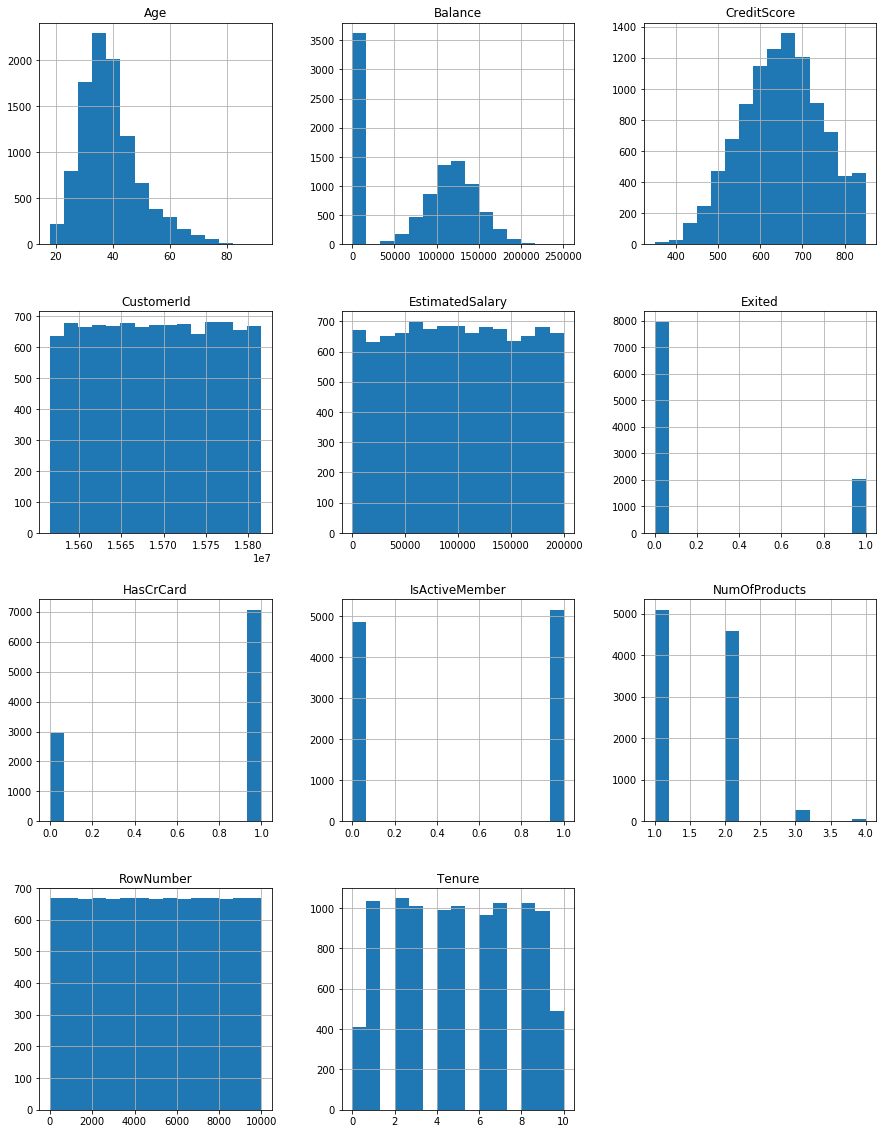

In [10]:
### Plot Distibutions ###
graph_1 = plt.figure(figsize = (15,20))
ax = graph_1.gca()
data_numerical.hist(ax = ax, bins = 15)
plt.show()

From the numerical variables distribution we can see that the first 3: 'Age', 'CreditScore', and 'Balance' present a semi-normal distribution, whereas the other variables like 'RowNumber' and  'Ternure' present a similar distribution among theirselves

From the graph we can also observe, that we have to drop the RowNumber column and the Id, that is a variable that is repeated with the index of the row

In [11]:
print(data.Surname.value_counts().sort_index().head())
print("\n")

Abazu       2
Abbie       1
Abbott      4
Abdullah    1
Abdulov     2
Name: Surname, dtype: int64




In [12]:
len(data.Surname.unique())
data.Surname.value_counts().head(10)

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
Yeh         25
Shih        25
Genovese    25
Wright      24
Maclean     24
Name: Surname, dtype: int64

From the table, we can see that Surname is going to be very difficult to encode as it presents 2932 unique surnames distributed among the 10,000 observations. Additionally, there is repeated surnames

A priori we can observe that some variables are not useful for our analysis, these ones are: CustomerId as thet are just an id identification with similar values, Surname, as encoding will be a nightmare, and because we have people with same Lastnames, that will be hard to interpret later on in the model, and RowNumber, as this information we already have it as the row indeces 

### Dropping unuseful variables

In [13]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Plotting the categorical variables, correlation matrix

For this, we need to encode our categorical variables, a priori we know that these variables were: Surname, Geography and Gender. Additionally the dataset presents variables that are already coded in binary form as: HasCrCard, IsActiveMember and Exited, teh last one of particular interest for us as it will be regarded as our target variable.
Let's verify the 3 remaining 'object' type variables: Surname, Geography and Gender

In [15]:
print(data.Geography.value_counts().sort_index())
print("\n")
print(data.Gender.value_counts().sort_index())

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Female    4543
Male      5457
Name: Gender, dtype: int64


#### Data visualization of our class variables (7)

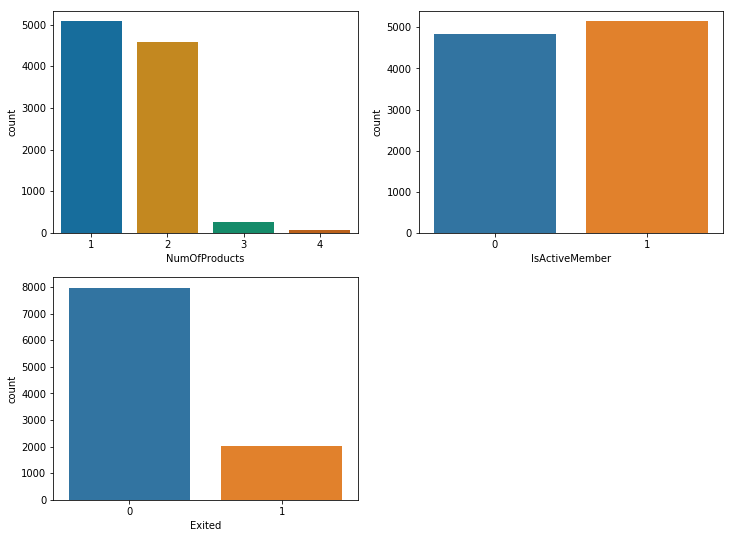

In [16]:
plt.figure(figsize=(12, 9))
plt.subplot(2,2,1)
sns.countplot((data.NumOfProducts), palette='colorblind')

plt.subplot(2,2,2)
sns.countplot(data.IsActiveMember)

plt.subplot(2,2,3)
sns.countplot(data.Exited)

As we can see some of our 'numerical' variables are actually class variables, so we will need to encode them after the train/test split

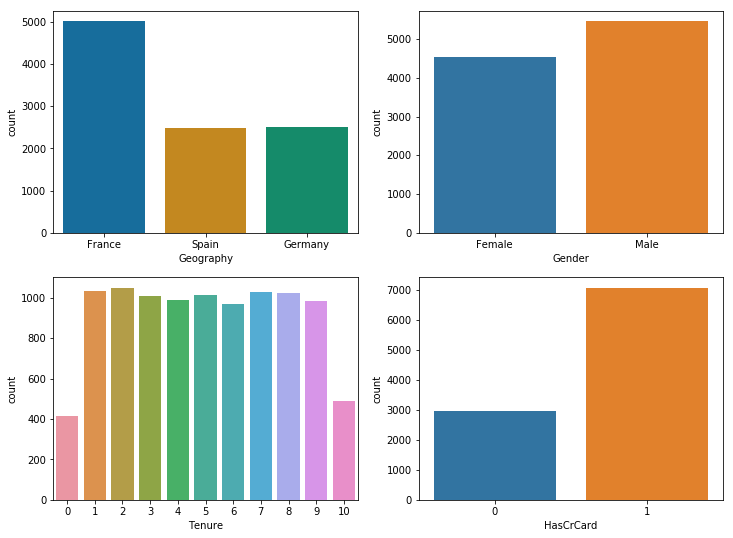

In [17]:
plt.figure(figsize=(12, 9))

plt.subplot(2,2,1)
sns.countplot((data.Geography), palette='colorblind')

plt.subplot(2,2,2)
sns.countplot(data.Gender)

plt.subplot(2,2,3)
sns.countplot(data.Tenure)

plt.subplot(2,2,4)
sns.countplot(data.HasCrCard)

From the graph, we can see that the Geography variable displays only 3 countries: France, Germany and Spain.

Finally, the variable Gender, as expected presents 2 levels, Female and Male that we will need to encode into 0 and 1's


### Correlation of the variables, heatmap


In [18]:
def variabletype(data):
    colname=data.columns
    coltype=data.dtypes
    variabletype=[]
    for i in data:
        if (data[i].nunique()>11) and (data[i].dtype=='int64' or data[i].dtype=='float64'):
            variabletype.append('Continuous')
        else:
            variabletype.append('Class')
    #variabletype
    dict={'ColumnName':colname,
         'Column_dtype':coltype,
          'Variable_Type':variabletype}
    return pd.DataFrame(dict)
df1=variabletype(data)
df1

,ColumnName,Column_dtype,Variable_Type
CreditScore,CreditScore,int64,Continuous
Geography,Geography,object,Class
Gender,Gender,object,Class
Age,Age,int64,Continuous
Tenure,Tenure,int64,Class
Balance,Balance,float64,Continuous
NumOfProducts,NumOfProducts,int64,Class
HasCrCard,HasCrCard,int64,Class
IsActiveMember,IsActiveMember,int64,Class
EstimatedSalary,EstimatedSalary,float64,Continuous


In [19]:
def correlation_matrix(data):
    sns.set(style="dark", palette='colorblind')
    corr = data.corr('spearman')
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    return sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, annot = corr.round(2), linewidths=.5, cbar_kws={"shrink": .5})

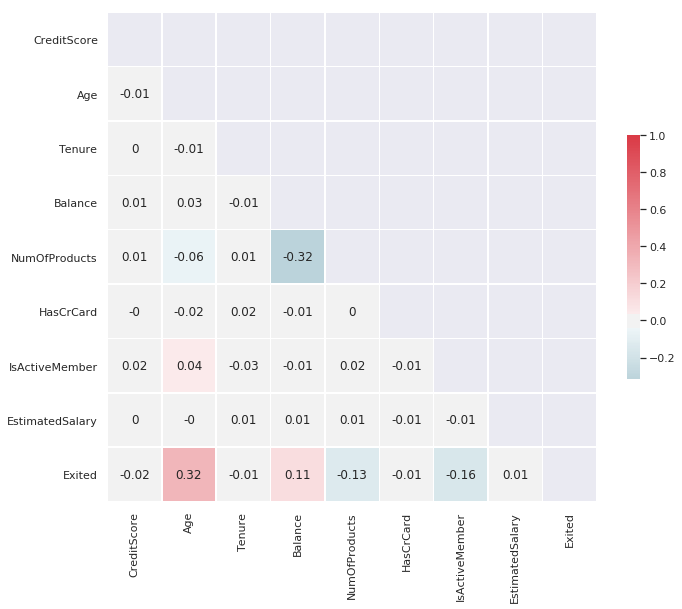

In [20]:
correlation_matrix(data)

Spearman correlation was selected, because eventhough all our variables are manually encoded, their data_type is still object.
In this scenario we can say that:

Correlations are very low among our variables, being the higuest 0.32 between age and the fact if the client left the bank. Actually, this is our fist insight, as one first educated guess will be that younger the clients have a higuer the probability to change among banks as their mentality is more flexible.
The second 'high' positive correlation we have is 0.11 between the balance and the explanatory variable.
Finally, on the negative correlations we have -0.32 between balance and number of products, which translate into less number of products higuer balance of our client.

## Feature engineering

In this section, we will be performing data transformations

### Variable creation

In [21]:
# Salary to Balance Ratio
data['BalanceToSalaryRatio']=data.EstimatedSalary/data.Balance

# Score to Balance Ratio
data['ScoreToBalance']=data.CreditScore/data.Balance

# age to Salary ratio
data['SalaryToAge']=data.Age/data.EstimatedSalary

# Products to Balance
data['ProductsToBalance']=data.NumOfProducts/data.Balance

In [22]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceToSalaryRatio,ScoreToBalance,SalaryToAge,ProductsToBalance
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,inf,inf,0.000414,inf
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1.342864,0.007255,0.000364,0.000012
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.713585,0.003144,0.000369,0.000019
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,inf,inf,0.000416,inf
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.630098,0.006772,0.000544,0.000008


#### Replacing the 'inf values' to zero

In [23]:
data=data.replace([np.inf, -np.inf], 0)

## Train and Test split

Based on various articles that mention the 'data lickage', to follow is performed the train, test split before the feature generation and standarization

##### Rule of thumb: Split your dataset into train and test sets before you do any processing to the data. Otherwise there might be data leakage that makes model evaluation overly optimistic. One of the common causes of data leakage is due to train-test split after data processing.

In [24]:
X=data[data.columns.difference(['Exited'])]
y=data['Exited']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42
                                                   )

In [26]:
print(dimensionality(X_train))
print(dimensionality(X_test))

The dataset has 8000  observations, and  14 columns
None
The dataset has 2000  observations, and  14 columns
None


In [27]:
print('The dataset has' , y_train.shape[0], 'observations')
print('The dataset has' , y_test.shape[0], 'observations')

The dataset has 8000 observations
The dataset has 2000 observations


### Missing values treatment and imputation

#### Identification of the missing values, and their proportion in the data set

In [28]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Age                     0
Balance                 0
BalanceToSalaryRatio    0
CreditScore             0
EstimatedSalary         0
Gender                  0
Geography               0
HasCrCard               0
IsActiveMember          0
NumOfProducts           0
ProductsToBalance       0
SalaryToAge             0
ScoreToBalance          0
Tenure                  0
dtype: int64
Age                     0
Balance                 0
BalanceToSalaryRatio    0
CreditScore             0
EstimatedSalary         0
Gender                  0
Geography               0
HasCrCard               0
IsActiveMember          0
NumOfProducts           0
ProductsToBalance       0
SalaryToAge             0
ScoreToBalance          0
Tenure                  0
dtype: int64


In [29]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [30]:
missing_data(X_train)

,Age,Balance,BalanceToSalaryRatio,CreditScore,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,ProductsToBalance,SalaryToAge,ScoreToBalance,Tenure
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,int64,float64,float64,int64,float64,object,object,int64,int64,int64,float64,float64,float64,int64


The training data set does not present any missing values, which is very surprisingly if we consider the score of this data in Kaggle

### Binary encoding for the categorical variables 


In [31]:
numCols=[]
levCols=[]
response=[]
for i in X_train.columns:
    if (X_train[i].dtype=='int64' or X_train[i].dtype=='float64'):
        numCols.append(i)
    else:
        levCols.append(i)
        
print(numCols)
print(levCols)

['Age', 'Balance', 'BalanceToSalaryRatio', 'CreditScore', 'EstimatedSalary', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'ProductsToBalance', 'SalaryToAge', 'ScoreToBalance', 'Tenure']
['Gender', 'Geography']


In [32]:
for i in numCols:
    if (i=='NumOfProducts' or i=='HasCrCard' or i=='IsActiveMember' or i=='Tenure' ):
        levCols.append(i)

elements_to_remove= ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Tenure', 'Exited']
for j in elements_to_remove:
    if j in numCols:
        numCols.remove(j)

In [33]:
print(numCols)
print(levCols)
response = 'Exited'
response

['Age', 'Balance', 'BalanceToSalaryRatio', 'CreditScore', 'EstimatedSalary', 'ProductsToBalance', 'SalaryToAge', 'ScoreToBalance']
['Gender', 'Geography', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Tenure']


'Exited'

### Binary Encoder

We decided to use Binary encoding to avoid overpopulating the dataset of columns as One Hot Encoding does. The practical difference is that Binary encoding results in only log(base 2)ⁿ features, whereas in the One Hot Encoding we woould be creating as much columns as categories.

#### Training dataset

In [34]:
encoder=ce.BinaryEncoder(cols=levCols)

In [35]:
data_encoded=encoder.fit_transform(X_train[levCols])
X_train=pd.concat([X_train, data_encoded], axis=1)
X_train.head()

,Age,Balance,BalanceToSalaryRatio,CreditScore,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,ProductsToBalance,SalaryToAge,ScoreToBalance,Tenure,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,NumOfProducts_0,NumOfProducts_1,NumOfProducts_2,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4
9254,32,0.00,0.000000,686,179093.26,Male,France,1,1,2,0.000000,0.000179,0.000000,6,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1
1561,42,119624.60,1.638282,632,195978.86,Male,Germany,1,1,2,0.000017,0.000214,0.005283,4,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
1670,24,114739.92,0.748571,559,85891.02,Male,Spain,1,0,1,0.000009,0.000279,0.004872,3,0,1,0,1,1,0,1,1,0,0,1,0,0,0,0,1,1
6087,27,135637.00,1.128604,561,153080.40,Female,France,1,0,1,0.000007,0.000176,0.004136,9,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0
6669,56,142147.32,0.277797,517,39488.04,Male,France,0,0,1,0.000007,0.001418,0.003637,9,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0


#### Test dataset

On test data we only 'transform' not fit

In [36]:
data_encoded2=encoder.transform(X_test[levCols])
X_test=pd.concat([X_test, data_encoded2], axis=1)
X_test.head()

,Age,Balance,BalanceToSalaryRatio,CreditScore,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,ProductsToBalance,SalaryToAge,ScoreToBalance,Tenure,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,NumOfProducts_0,NumOfProducts_1,NumOfProducts_2,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4
6252,32,96709.07,0.432104,596,41788.37,Male,Germany,0,0,2,0.000021,0.000766,0.006163,3,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1
4684,43,0.00,0.000000,623,146379.30,Male,France,1,1,2,0.000000,0.000294,0.000000,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1
1731,44,0.00,0.000000,601,58561.31,Female,Spain,1,0,2,0.000000,0.000751,0.000000,4,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0
4742,59,119152.10,1.432453,506,170679.74,Male,Germany,1,1,2,0.000017,0.000346,0.004247,8,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0
4521,27,124995.98,0.917388,560,114669.79,Female,Spain,1,1,1,0.000008,0.000235,0.004480,7,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1


### Standarization of numerical, continuous variables

To run some of our algorithms, the data standarization is required, so as follows, we perform it on the "numCols" variables

As we are going to use  decision trees, and ensemble version of it (Gradient Boosting Tree, Random Forest etc), we do not need to normalize the data because the tree based algorithms try to find intervals separating the regions. Insisting on it, would probably you would run into numeric issues.
__However__, because we will be aplying other algorithms and we have performed the exercses before without standarization, we have decided to comply with this requirement

### Manual encoding of the categorical variables

As pre-step of the scaling processing we will be manually encoding the level variables

#### Training dataset

In [37]:
#Gender
X_train['Gender'].replace(to_replace='Male', value='0', regex=True, inplace=True)
X_train['Gender'].replace(to_replace='Female', value='1', regex=True, inplace=True)
#Geography
X_train['Geography'].replace(to_replace='Spain', value='0', regex=True, inplace=True)
X_train['Geography'].replace(to_replace='Germany', value='1', regex=True, inplace=True)
X_train['Geography'].replace(to_replace='France', value='2', regex=True, inplace=True)

In [38]:
X_train['Gender'] = X_train.Gender.astype(int)
X_train['Geography'] = X_train.Geography.astype(int)

In [39]:
X_train.head()

,Age,Balance,BalanceToSalaryRatio,CreditScore,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,ProductsToBalance,SalaryToAge,ScoreToBalance,Tenure,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,NumOfProducts_0,NumOfProducts_1,NumOfProducts_2,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4
9254,32,0.00,0.000000,686,179093.26,0,2,1,1,2,0.000000,0.000179,0.000000,6,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1
1561,42,119624.60,1.638282,632,195978.86,0,1,1,1,2,0.000017,0.000214,0.005283,4,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
1670,24,114739.92,0.748571,559,85891.02,0,0,1,0,1,0.000009,0.000279,0.004872,3,0,1,0,1,1,0,1,1,0,0,1,0,0,0,0,1,1
6087,27,135637.00,1.128604,561,153080.40,1,2,1,0,1,0.000007,0.000176,0.004136,9,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0
6669,56,142147.32,0.277797,517,39488.04,0,2,0,0,1,0.000007,0.001418,0.003637,9,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0


#### Test dataset

In [40]:
#Gender
X_test['Gender'].replace(to_replace='Male', value='0', regex=True, inplace=True)
X_test['Gender'].replace(to_replace='Female', value='1', regex=True, inplace=True)
#Geography
X_test['Geography'].replace(to_replace='Spain', value='0', regex=True, inplace=True)
X_test['Geography'].replace(to_replace='Germany', value='1', regex=True, inplace=True)
X_test['Geography'].replace(to_replace='France', value='2', regex=True, inplace=True)

In [41]:
X_test['Gender'] = X_test.Gender.astype(int)
X_test['Geography'] = X_test.Geography.astype(int)

In [42]:
X_test.head()

,Age,Balance,BalanceToSalaryRatio,CreditScore,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,ProductsToBalance,SalaryToAge,ScoreToBalance,Tenure,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,NumOfProducts_0,NumOfProducts_1,NumOfProducts_2,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4
6252,32,96709.07,0.432104,596,41788.37,0,1,0,0,2,0.000021,0.000766,0.006163,3,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1
4684,43,0.00,0.000000,623,146379.30,0,2,1,1,2,0.000000,0.000294,0.000000,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1
1731,44,0.00,0.000000,601,58561.31,1,0,1,0,2,0.000000,0.000751,0.000000,4,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0
4742,59,119152.10,1.432453,506,170679.74,0,1,1,1,2,0.000017,0.000346,0.004247,8,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0
4521,27,124995.98,0.917388,560,114669.79,1,0,1,1,1,0.000008,0.000235,0.004480,7,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1


### Satandarization: Using the train mean on the test set by Standard Scaler

##### Satandarization __on__ Numeric Variables 

In [43]:
X_train1= X_train.copy()
X_train2= X_train.copy()
X_test1= X_test.copy()
X_test2=  X_test.copy()
columns_to_standarize=['Age', 'Balance', 'BalanceToSalaryRatio', 'CreditScore', 'EstimatedSalary',
                      'ProductsToBalance', 'SalaryToAge', 'ScoreToBalance']
#X_train2[columns_to_standarize] = X_train2[columns_to_standarize].apply(lambda x: (x-x.mean()/x.std()))

In [44]:
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2[columns_to_standarize])
X_test2 = sc.transform(X_test2[columns_to_standarize])

In [45]:
X_train2=pd.DataFrame(X_train2, columns=columns_to_standarize)

In [46]:
X_test2=pd.DataFrame(X_test2, columns=columns_to_standarize)

In [47]:
X_train1.reset_index(drop=True, inplace=True)
X_test1.reset_index(drop=True, inplace=True)
X_train2.reset_index(drop=True, inplace=True)
X_test2.reset_index(drop=True, inplace=True)

In [48]:
X_train1.drop(['Age', 'Balance', 'BalanceToSalaryRatio', 'CreditScore', 'EstimatedSalary',
                      'ProductsToBalance', 'SalaryToAge', 'ScoreToBalance'],axis=1, inplace=True)
X_test1.drop(['Age', 'Balance', 'BalanceToSalaryRatio', 'CreditScore', 'EstimatedSalary',
                      'ProductsToBalance', 'SalaryToAge', 'ScoreToBalance'],axis=1, inplace=True)

In [49]:
X_train1=pd.concat([X_train1, X_train2], axis=1)
missing_data(X_train1)

,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,Tenure,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,NumOfProducts_0,NumOfProducts_1,NumOfProducts_2,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Age,Balance,BalanceToSalaryRatio,CreditScore,EstimatedSalary,ProductsToBalance,SalaryToAge,ScoreToBalance
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64


In [50]:
X_test1=pd.concat([X_test1, X_test2], axis=1)
missing_data(X_test1)

,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,Tenure,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,NumOfProducts_0,NumOfProducts_1,NumOfProducts_2,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Age,Balance,BalanceToSalaryRatio,CreditScore,EstimatedSalary,ProductsToBalance,SalaryToAge,ScoreToBalance
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64


#### Final train and test datasets standarized

In [51]:
X_train_standarized=X_train1.copy()
X_test_standarized=X_test1.copy()

#### Oversampling the standarized dataset

In [52]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state= 42)
X_train_standarized_upsampled, y_train_standarized_upsampled = ros.fit_sample(X_train_standarized, y_train)
y_vals_, counts_ = np.unique(y_train, return_counts=True)
y_vals_ros_, counts_ros_ = np.unique(y_train_standarized_upsampled, return_counts=True)
print(' Classes in the train set originally were:',dict(zip(y_vals_, counts_)),'\n',
      'Classes in the rebalanced train set are now:',dict(zip(y_vals_ros_, counts_ros_)))

 Classes in the train set originally were: {0: 6356, 1: 1644} 
 Classes in the rebalanced train set are now: {0: 6356, 1: 6356}


In [53]:
#X_test_standarized

## Feature selection by Random Forest Classifier

In [54]:
features=X_train.columns
features

Index(['Age', 'Balance', 'BalanceToSalaryRatio', 'CreditScore',
       'EstimatedSalary', 'Gender', 'Geography', 'HasCrCard', 'IsActiveMember',
       'NumOfProducts', 'ProductsToBalance', 'SalaryToAge', 'ScoreToBalance',
       'Tenure', 'Gender_0', 'Gender_1', 'Geography_0', 'Geography_1',
       'Geography_2', 'HasCrCard_0', 'HasCrCard_1', 'IsActiveMember_0',
       'IsActiveMember_1', 'NumOfProducts_0', 'NumOfProducts_1',
       'NumOfProducts_2', 'Tenure_0', 'Tenure_1', 'Tenure_2', 'Tenure_3',
       'Tenure_4'],
      dtype='object')

#### Hyperparameter tuning

In [55]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 700, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start=10, stop=100, num = 10)]
# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'n_estimators': [50, 122, 194, 266, 338, 411, 483, 555, 627, 700]}


In [56]:
# Using the random grid to search for best hyperparameters
# First creating the base model to tune
random_forest = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random_forest_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
random_forest_random.fit(X_train[features], y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [57]:
random_forest_random.best_params_

{'n_estimators': 50, 'max_depth': 10}

#### Evaluation of the random search

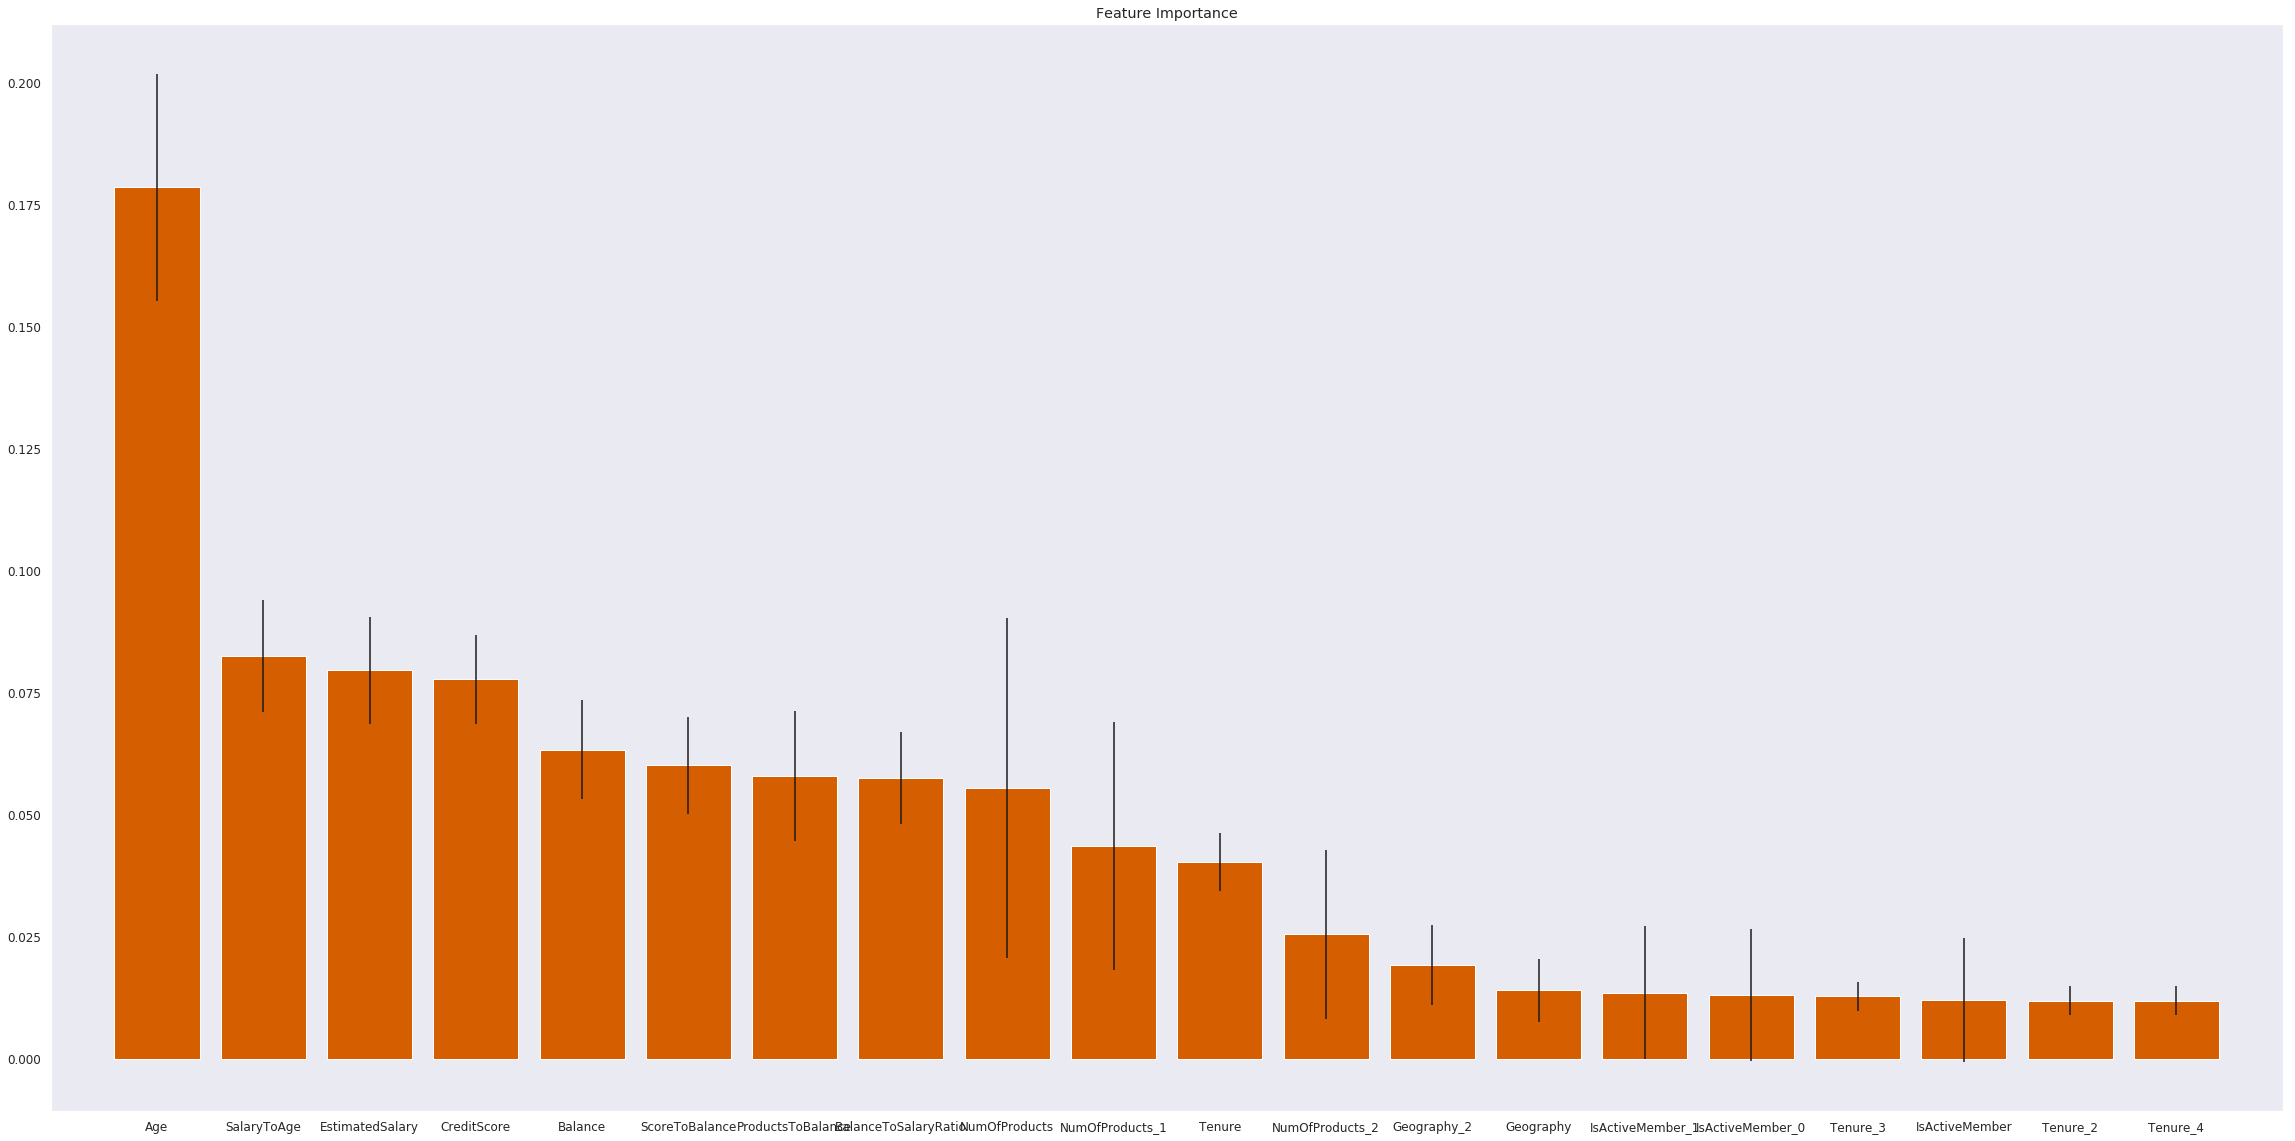

In [58]:
random_forest_random_tunned = RandomForestClassifier(max_depth=40, n_estimators=700, random_state=42)
random_forest_random_tunned.fit(X_train, y_train)
plot_feature_importances(random_forest_random_tunned, feature_names=features, figsize=(40, 20));

From the Random Forest classifier we would be tempted to include the features: we will include the 20 of them and compare them with the xgboost classifier
    - age (definitely)
    - SalaryToAge
    - EstimatedSalary 
    - CreditScore
    - Balance
    - ScoreToBalance
    - BalanceToSalaryRatio
    - ProductsToBalance
    - Num of Products
    - Tenure
    - NumOfProducts_2     
    - NumOfProducts_1
    - NumOfProducts_0
    - Geography_2
    - Geography
    - Tenure_4
    - IsActiveMember_1
    - IsActiveMember
    - IsActiveMember_0
    - Tenure_2

From the previous, we are pleased to see that the ratios generated are in the top features importances and we will be keeping them. However, there is some overlapping among the original variables and the encoded variables, so we will be dropping the original variables and taking just the encoded.

#### Train dataset

In [59]:
X_train.head()

,Age,Balance,BalanceToSalaryRatio,CreditScore,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,NumOfProducts,ProductsToBalance,SalaryToAge,ScoreToBalance,Tenure,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,NumOfProducts_0,NumOfProducts_1,NumOfProducts_2,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4
9254,32,0.00,0.000000,686,179093.26,0,2,1,1,2,0.000000,0.000179,0.000000,6,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1
1561,42,119624.60,1.638282,632,195978.86,0,1,1,1,2,0.000017,0.000214,0.005283,4,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
1670,24,114739.92,0.748571,559,85891.02,0,0,1,0,1,0.000009,0.000279,0.004872,3,0,1,0,1,1,0,1,1,0,0,1,0,0,0,0,1,1
6087,27,135637.00,1.128604,561,153080.40,1,2,1,0,1,0.000007,0.000176,0.004136,9,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0
6669,56,142147.32,0.277797,517,39488.04,0,2,0,0,1,0.000007,0.001418,0.003637,9,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0


### Xgboost feature importance by permutation

#### Hyperameter tuning

In K-Fold CV, we further will split our training set into K number of subsets, aka folds.

In K = 5, the first iteration we train on the first four folds and evaluate on the fifth. The second time we train on the first, second, third, and fifth fold and evaluate on the fourth and so on..

For hyperparameter tuning, we perform many iterations of the entire K-Fold CV process, each time using different model settings. We then compare all of the models, select the best one, train it on the full training set, and then evaluate on the testing set. 

Parameters to test in the hypertuning: According to literature, the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features) and max_depth = max number of levels in each decision tree

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

To use RandomizedSearchCV, we first need to create a parameter grid to sample from during the fitting:

In [61]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 700, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start=10, stop=100, num = 10)]
# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [50, 122, 194, 266, 338, 411, 483, 555, 627, 700]}


In [62]:
# Using the random grid to search for best hyperparameters
# First creating the base model to tune
xg_boost = xgb.XGBClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xg_boost_random = RandomizedSearchCV(estimator = xg_boost, param_distributions = random_grid, n_iter = 20, 
                                     cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
xg_boost_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  4.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='dep

In [63]:
xg_boost_random.best_params_

{'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 20}

#### Evaluation of the Random search

In [64]:
xg_boost_random_tunned = xgb.XGBClassifier(n_estimators=50, max_depth=20, random_state=42)
xg_boost_random_tunned.fit(X_train, y_train)
explain_weights_xgboost(xg_boost_random_tunned)

Weight,Feature
0.2965,NumOfProducts_1
0.2566,NumOfProducts
0.0914,IsActiveMember
0.0535,Age
0.0468,Geography_2
0.0206,Balance
0.0199,ProductsToBalance
0.0188,ScoreToBalance
0.0173,Tenure_2
0.0165,BalanceToSalaryRatio


From the Xgboost classifier we would be tempted to include the features:
    
    - NumOfProducts_2
    - NumOfProducts
    - IsActiveMember
    - Age
    - Geography_2
    - ProductsToBalance
    - ScoreToBalance
    - Balance
    - BalanceToSalaryRatio
    - SalaryToAge
    - EstimatedSalary
    - Gender
    - Geography
    - HasCrCard
    - CreditScore
    - Tenure_2
    - Tenure_3
    - Tenure_4
    - Tenure
    - Tenure_1

### Selecting the variables and discarding those overlapped by the Binary encoder

In [65]:
overlapping_variables=['Gender', 'Geography', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Tenure']

### Selecting the features

In [66]:
features = ['Age', 'Balance', 'BalanceToSalaryRatio', 'CreditScore',
       'EstimatedSalary', 'ProductsToBalance', 'SalaryToAge', 'ScoreToBalance',
        'Gender_0', 'Gender_1', 'Geography_0', 'Geography_1',
       'Geography_2', 'HasCrCard_0', 'HasCrCard_1', 'IsActiveMember_0',
       'IsActiveMember_1', 'NumOfProducts_0', 'NumOfProducts_1',
       'NumOfProducts_2', 'Tenure_0', 'Tenure_1', 'Tenure_2', 'Tenure_3',
       'Tenure_4']
len(features)

25

#### Verifying on the Random Forest Classifier, feature importance:

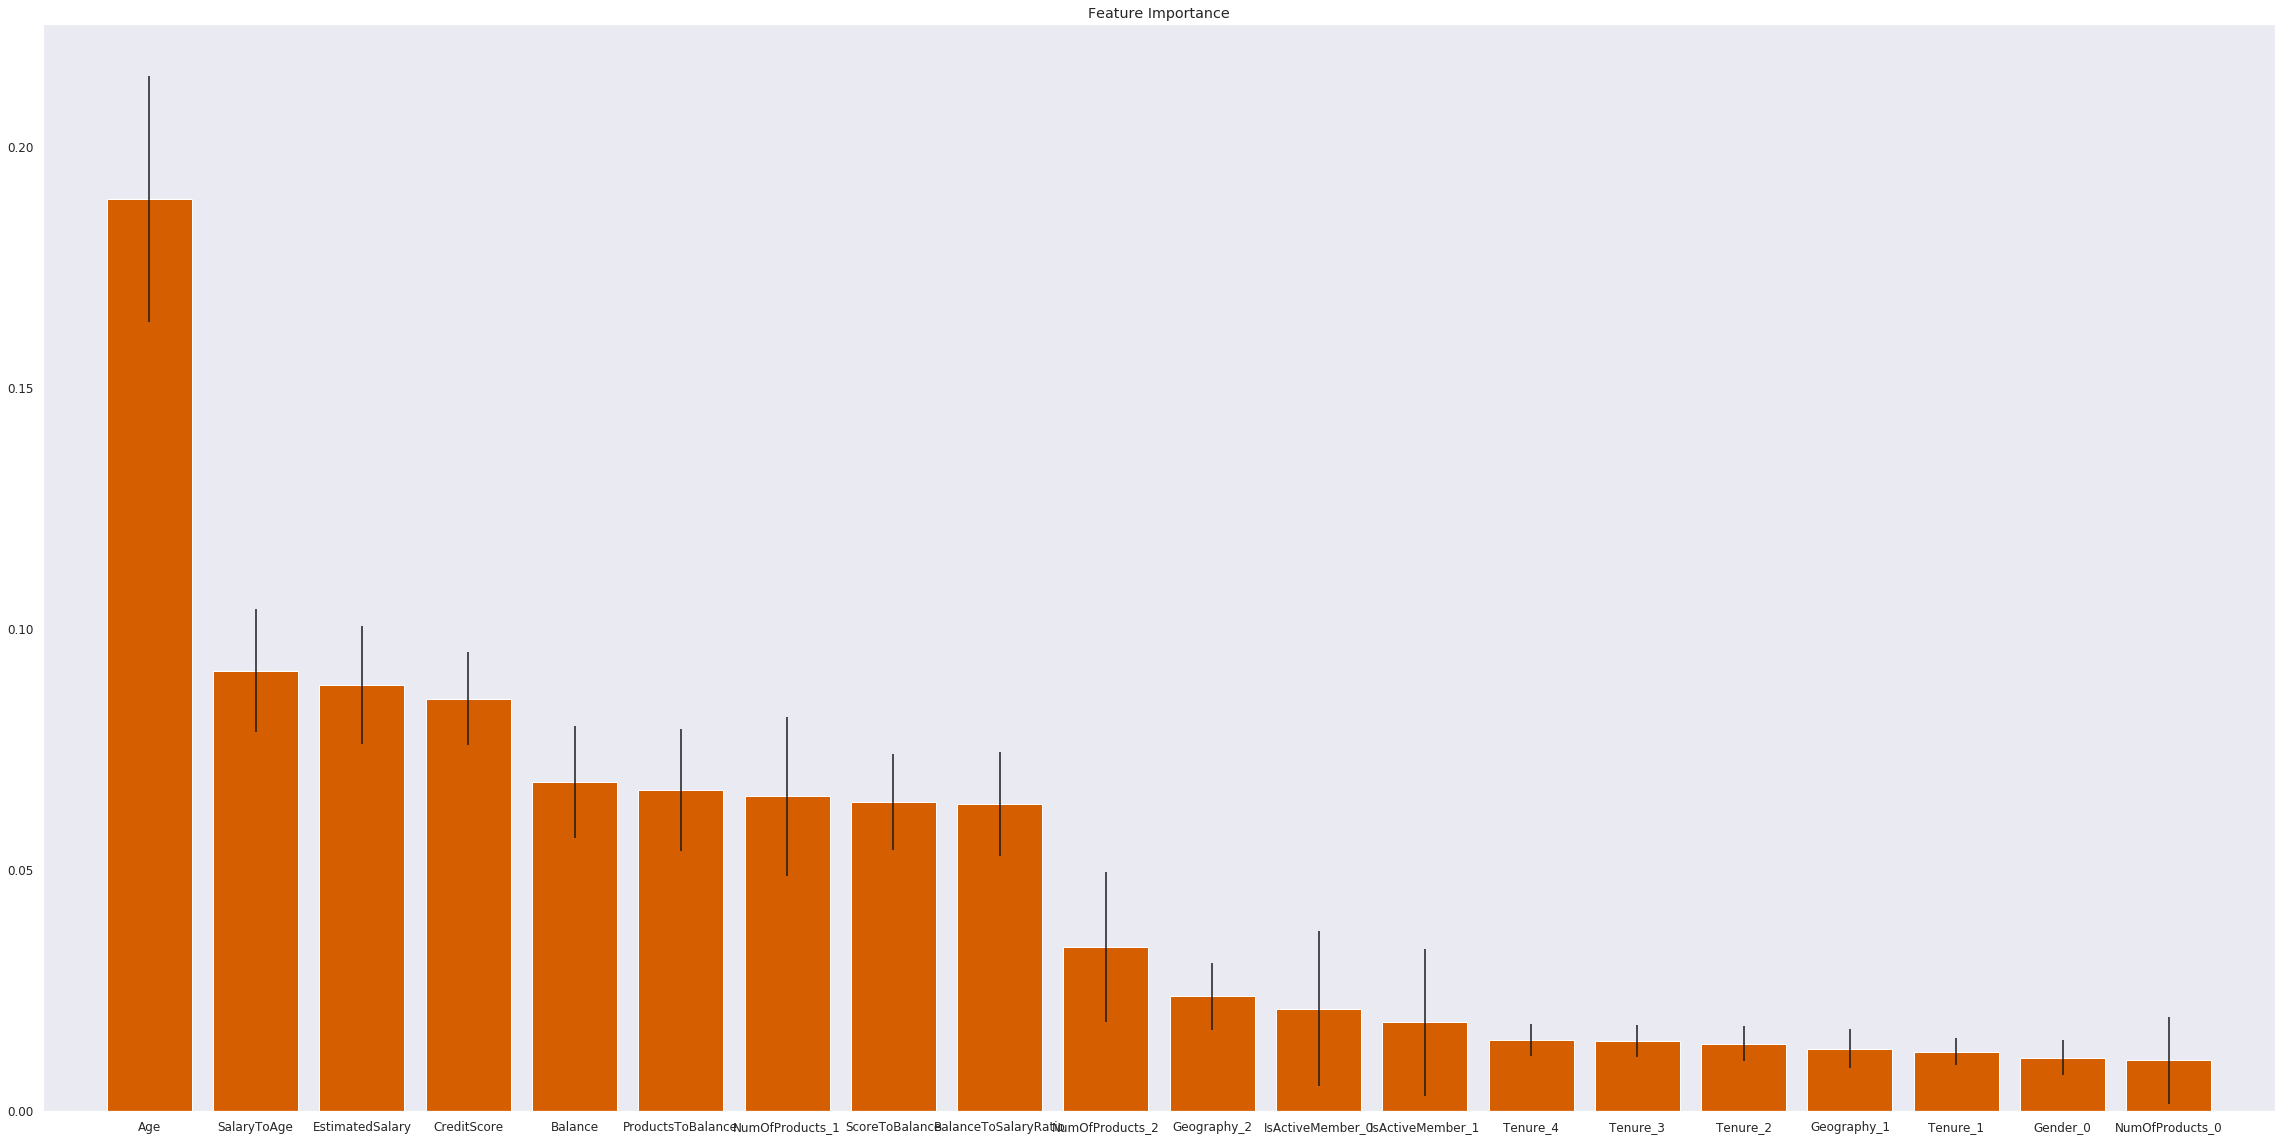

In [67]:
random_forest_selected_features = RandomForestClassifier(max_depth=40, n_estimators=122, random_state=42)
random_forest_selected_features.fit(X_train[features], y_train)
plot_feature_importances(random_forest_selected_features, feature_names=features, figsize=(40, 20));

In [68]:
xg_boost_random_selected_features = xgb.XGBClassifier(n_estimators=50, max_depth=20, random_state=42)
xg_boost_random_selected_features.fit(X_train[features], y_train)
explain_weights_xgboost(xg_boost_random_selected_features)

Weight,Feature
0.2328,NumOfProducts_1
0.1981,NumOfProducts_0
0.1926,NumOfProducts_2
0.0861,IsActiveMember_0
0.0486,Age
0.0356,Geography_2
0.0194,ProductsToBalance
0.0182,Balance
0.0165,ScoreToBalance
0.0156,BalanceToSalaryRatio


# Base model

### Logistic regression, no upsampling

#### Creating a table for model comparisons

In [69]:
col_names =  ['Model', 'Precision', 'Recall', 'F1-score', 'Accuracy']
model_comparison = pd.DataFrame(columns = col_names)
model_comparison

,Model,Precision,Recall,F1-score,Accuracy


#### Calculating the model

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# logistic regression object 
lr = LogisticRegression() 
# Training the model on train set 
lr.fit(X_train[features], y_train) 
# Predicting on test set
predictions_logistic_regression = lr.predict(X_test[features]) 

print(classification_report(y_test, predictions_logistic_regression)) 

#Extracting the results
logistic_regression_report = classification_report(y_test, predictions_logistic_regression, output_dict=True )
precision_logistic_regression =  logistic_regression_report['macro avg']['precision'] 
recall_logistic_regression = logistic_regression_report['macro avg']['recall']    
f1_score_logistic_regression = logistic_regression_report['macro avg']['f1-score']
accuracy_logistic_regression = logistic_regression_report['accuracy']

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



#### Confusion matrix of Logistic Regression

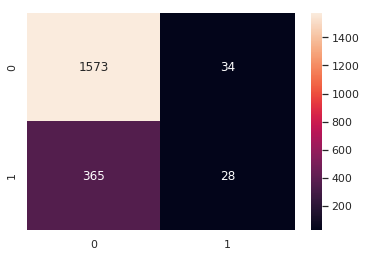

In [71]:
cm_logistic_regression = confusion_matrix(y_test, predictions_logistic_regression)

sns.heatmap(cm_logistic_regression, annot = True, fmt = 'd')

#### Testing the stability of the model by cross_validation on train set

To do so, local validation will be selected. The argument behind this, is  that if we use always the test set for validation, it can lead to overfitting. 

So its better to do cross validate on more segments of unseen data'

In [72]:
def logistic_regression_cv(X_train, y_train, features, k):
    train_roc_auc, test_roc_auc, iteration = [], [], []
    i = 1
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    for train, test in kf.split(X_train.index.values):
        # Logistic regression model    
        lr = LogisticRegression()        
        lr.fit(X_train.iloc[train][features],y_train.iloc[train]) 
        #Predictions on train and test set from cross val
        preds_train=lr.predict(X_train.iloc[train][features])
        preds_test = lr.predict(X_train.iloc[test][features])
        train_roc_auc.append(roc_auc_score(y_train.iloc[train], preds_train))
        test_roc_auc.append(roc_auc_score(y_train.iloc[test], preds_test))
        iteration.append(i)
        i+=1  
    columns = {'Iteration': iteration, 'Train ROC AUC': train_roc_auc, 'Test ROC AUC': test_roc_auc}
    results = pd.DataFrame.from_dict(columns)
    results2 = results.drop(['Iteration'], axis=1)
    results2.boxplot()
    results.loc[len(results)] = ["Mean", np.mean(train_roc_auc), np.mean(test_roc_auc)]
    display(results)

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.517049,0.515389
1,2,0.516593,0.515894
2,3,0.515356,0.511528
3,4,0.515249,0.526107
4,5,0.522452,0.512910
5,Mean,0.517340,0.516366


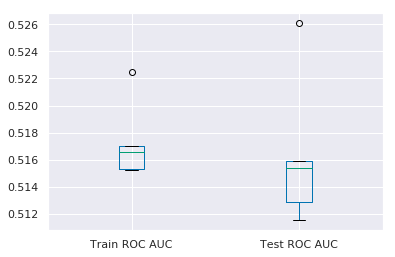

In [73]:
logistic_regression_cv(X_train, y_train, features, 5)

#### Feeding the model comparison table

In [74]:
logistic_regression_result= ['logistic regression', precision_logistic_regression, recall_logistic_regression, f1_score_logistic_regression,
                                 accuracy_logistic_regression]
model_comparison.loc[len(model_comparison)] = logistic_regression_result
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005


## Base model: Logistic regression,  upsampling

### Checking for imbalanced data

Important Note. Always split into test and train sets BEFORE trying oversampling techniques! Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets

In order to prevent the future algorithms to be biassed towards our categorical variable: Exited. To follow is presented the analysis to see if efectively, we are dealing with an imbalanced dataset

### Upsampling

For this, we will be using Random Oversampling, that according to documentation is a replacement sampling that can be used to  get a balanced representation of each class in the training set.

0    6356
1    1644
Name: Exited, dtype: int64

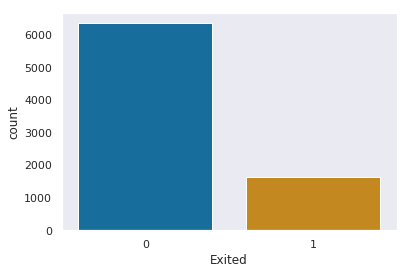

In [75]:
sns.countplot(y_train)
y_train.value_counts()

From the histogram, we may see that the data accounts for an imbalance, as the Exited variable, yes represents only the 2% of the dataset

Being the actual proportion in the train set 3.901 times to 1. Reason by which we need to resample our target variable

In this case we will take integrally the Exited ('No') observations and we will be oversampling the ('Yes') observations in the datset, because according to literature undersampling is more suitable for a million of observations dataset, whereas in this case, we are dealing with thousands of observations, the literature suggest oversampling

In [76]:
# Dividing by 0's and 1's
y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train== 1]

In [77]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_sample(X_train, y_train)
y_vals, counts = np.unique(y_train, return_counts=True)
y_vals_ros, counts_ros = np.unique(y_train_res, return_counts=True)
print(' Classes in the train set originally were:',dict(zip(y_vals, counts)),'\n',
      'Classes in the rebalanced train set now are:',dict(zip(y_vals_ros, counts_ros)))

 Classes in the train set originally were: {0: 6356, 1: 1644} 
 Classes in the rebalanced train set now are: {0: 6356, 1: 6356}


In [78]:
# logistic regression object with over sampling
lr2 = LogisticRegression() 
# Training the model on train set 
lr2.fit(X_train_res[features], y_train_res) 
# Predicting on test set
predictions_logistic_regression_up = lr2.predict(X_test[features]) 

# print classification report 
print(classification_report(y_test, predictions_logistic_regression_up)) 

#Extracting the results
logistic_regression_report_up = classification_report(y_test, predictions_logistic_regression_up, output_dict=True )
precision_logistic_regression_up =  logistic_regression_report_up['macro avg']['precision'] 
recall_logistic_regression_up = logistic_regression_report_up['macro avg']['recall']    
f1_score_logistic_regression_up = logistic_regression_report_up['macro avg']['f1-score']
accuracy_logistic_regression_up = logistic_regression_report_up['accuracy']

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1607
           1       0.38      0.75      0.51       393

    accuracy                           0.71      2000
   macro avg       0.65      0.73      0.65      2000
weighted avg       0.81      0.71      0.74      2000



The model’s ability to classify all destinations (accuracy) decreased with oversampling. On the other hand, the model’s ability to classify the minority class (recall) improved 

#### Confusion matrix of Logistic Regression

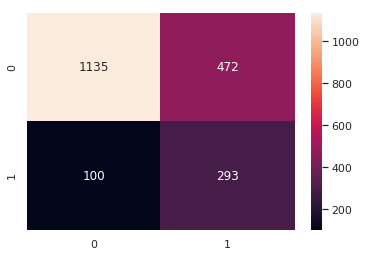

In [79]:
cm_logistic_regression_up = confusion_matrix(y_test, predictions_logistic_regression_up)

sns.heatmap(cm_logistic_regression_up, annot = True, fmt = 'd')

#### Testing the stability of the model by cross_validation on train set

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.657679,0.691292
1,2,0.664515,0.657637
2,3,0.716312,0.712571
3,4,0.716478,0.703676
4,5,0.665508,0.661954
5,Mean,0.684098,0.685426


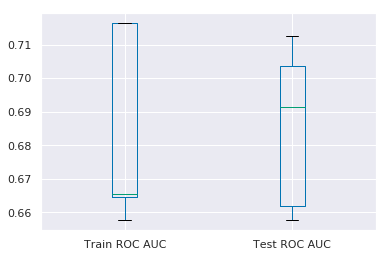

In [80]:
logistic_regression_cv(X_train_res, y_train_res, features, 5)

In [81]:
logistic_regression_result_up= ['logistic regression upsampled', precision_logistic_regression_up, 
                             recall_logistic_regression_up, f1_score_logistic_regression_up,
                            accuracy_logistic_regression_up]
model_comparison.loc[len(model_comparison)] = logistic_regression_result_up
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140


### Logistic regression with standarization and upsampling

In [82]:
#X_train_standarized_upsampled
#y_train_standarized_upsampled
#X_test_standarized

#### Calculating the model

In [83]:
# logistic regression object with over sampling
lr2 = LogisticRegression() 
# Training the model on train set 
lr2.fit(X_train_standarized_upsampled[features], y_train_standarized_upsampled) 
# Predicting on test set
predictions_logistic_regression_std_up = lr2.predict(X_test_standarized[features]) 

# print classification report 
print(classification_report(y_test, predictions_logistic_regression_std_up)) 

#Extracting the results
logistic_regression_report_std_up = classification_report(y_test, predictions_logistic_regression_std_up, output_dict=True )
precision_logistic_regression_std_up =  logistic_regression_report_std_up['macro avg']['precision'] 
recall_logistic_regression_std_up = logistic_regression_report_std_up['macro avg']['recall']    
f1_score_logistic_regression_std_up = logistic_regression_report_std_up['macro avg']['f1-score']
accuracy_logistic_regression_std_up = logistic_regression_report_std_up['accuracy']

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1607
           1       0.44      0.78      0.56       393

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.76      0.78      2000



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Confusion matrix for Logistic regression standarized and upsampled

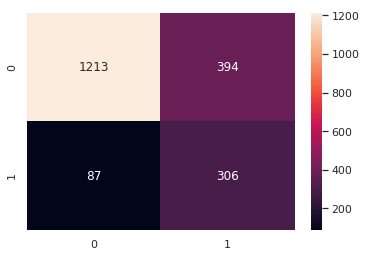

In [84]:
cm_logistic_regression_std_up = confusion_matrix(y_test, predictions_logistic_regression_std_up)

sns.heatmap(cm_logistic_regression_std_up, annot = True, fmt = 'd')

#### Testing the stability of the model by cross_validation on train set

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.752279,0.765890
1,2,0.758876,0.752775
2,3,0.758212,0.757711
3,4,0.755838,0.750451
4,5,0.757910,0.751368
5,Mean,0.756623,0.755639


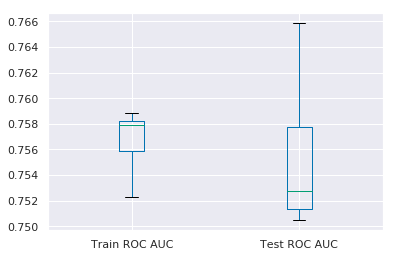

In [85]:
logistic_regression_cv(X_train_standarized_upsampled, y_train_standarized_upsampled, features, 5)

#### Feeding the model comparison table

In [86]:
logistic_regression_result_std_up= ['logistic regression standarized upsampled', precision_logistic_regression_std_up, 
                                    recall_logistic_regression_std_up, f1_score_logistic_regression_std_up,
                                 accuracy_logistic_regression_std_up]
model_comparison.loc[len(model_comparison)] = logistic_regression_result_std_up
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595


## Decision Trees

#### Hypertuning of parameters

4 parameters:

- max_features
- max_depth
- min_samples_split
- min_samples_leaf


In [87]:
# Creating the parameter grid
# Number of features to consider at every split
max_features = list(range(1,X_train.shape[1]))
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start= 10, stop= 100, num = 10)]
#min_samples_split
min_samples_split=[int(x) for x in np.linspace(start = 0.1, stop = 10, num = 10)]     
#min_samples_leaf                       
min_samples_leaf=[int(x) for x in np.linspace(start = 0.1, stop = 10, num = 10)]                      
                           
# Creating the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
#pprint(random_grid)

In [88]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
decision_tree_classifier = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
decision_tree_classifier_random = RandomizedSearchCV(estimator = decision_tree_classifier, 
                                                     param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, 
                                                     random_state=42, n_jobs = -1)
# Fit the random search model
decision_tree_classifier_random.fit(X_train[features], y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [89]:
decision_tree_classifier_random.best_params_
best_parameters = decision_tree_classifier_random.best_params_
pd.DataFrame(best_parameters.values(),best_parameters.keys(),columns=['Tuned Parameters'])

,Tuned Parameters
min_samples_split,5
min_samples_leaf,8
max_features,17
max_depth,10


#### The model: Decision tree classifier tunned

In [90]:
from sklearn.tree import DecisionTreeClassifier

# Defining the model:
decision_tree_classifier_tunned = DecisionTreeClassifier(min_samples_split= 10,
                                                         min_samples_leaf= 10,
                                                         max_features= 19,
                                                         max_depth= 10, 
                                                         random_state=42)
# Training the model:
decision_tree_classifier_tunned.fit(X_train[features], y_train)

# Predicting on test set:
tree_predictions = decision_tree_classifier_tunned.predict(X_test[features])

# Printing the classification report 
print(classification_report(y_test, tree_predictions)) 

#Extracting the results
decision_tree_report = classification_report(y_test, tree_predictions, output_dict=True )
precision_decision_tree =  decision_tree_report['macro avg']['precision'] 
recall_decision_tree = decision_tree_report['macro avg']['recall']    
f1_score_decision_tree = decision_tree_report['macro avg']['f1-score']
accuracy_decision_tree = decision_tree_report['accuracy']

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.69      0.46      0.55       393

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



#### Confusion matrix for Decision Tree



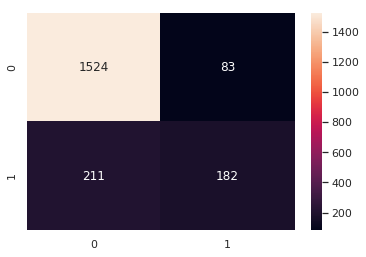

In [91]:
cm_decision_tree = confusion_matrix(y_test, tree_predictions)

sns.heatmap(cm_decision_tree, annot = True, fmt = 'd')

#### Testing the stability of the model by cross_validation on train set

In [92]:
def decision_tree_classifier_cv(X_train, y_train, features, k):
    train_roc_auc, test_roc_auc, iteration = [], [], []
    i = 1
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    for train, test in kf.split(X_train.index.values):
        # Model    
        decision_tree_classifier = DecisionTreeClassifier(min_samples_split= 10,
                                                         min_samples_leaf= 10,
                                                         max_features= 19,
                                                         max_depth= 10, 
                                                         random_state=42)       
        decision_tree_classifier.fit(X_train.iloc[train][features],y_train.iloc[train]) 
        #Predictions on train and test set from cross val
        preds_train=decision_tree_classifier.predict(X_train.iloc[train][features])
        preds_test = decision_tree_classifier.predict(X_train.iloc[test][features])
        train_roc_auc.append(roc_auc_score(y_train.iloc[train], preds_train))
        test_roc_auc.append(roc_auc_score(y_train.iloc[test], preds_test))
        iteration.append(i)
        i+=1  
    columns = {'Iteration': iteration, 'Train ROC AUC': train_roc_auc, 'Test ROC AUC': test_roc_auc}
    results = pd.DataFrame.from_dict(columns)
    results2 = results.drop(['Iteration'], axis=1)
    results2.boxplot()
    results.loc[len(results)] = ["Mean", np.mean(train_roc_auc), np.mean(test_roc_auc)]
    display(results)

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.776623,0.721657
1,2,0.774851,0.692860
2,3,0.773089,0.723293
3,4,0.784238,0.719588
4,5,0.766812,0.681984
5,Mean,0.775123,0.707877


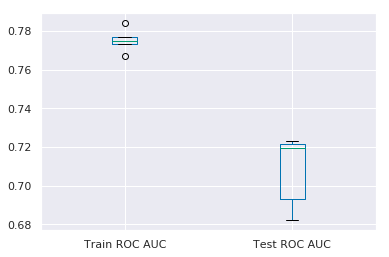

In [93]:
decision_tree_classifier_cv(X_train, y_train, features, 5)

#### Feeding the model comparison table

In [94]:
decision_tree_result= ['decision tree', precision_decision_tree, 
                                    recall_decision_tree, f1_score_decision_tree,
                                 accuracy_decision_tree]
model_comparison.loc[len(model_comparison)] = decision_tree_result
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530


### Decision Trees with upsampling

#### Hypertuning of parameters

In [95]:
# First create the base model to tune
decision_tree_classifier_up = DecisionTreeClassifier()
# Using the random grid to search for best hyperparameters
decision_tree_classifier_random_up = RandomizedSearchCV(estimator = decision_tree_classifier_up, 
                                    param_distributions = random_grid, n_iter = 100, cv = 3, 
                                    verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
decision_tree_classifier_random_up.fit(X_train_res[features], y_train_res)

decision_tree_best_parameters_up = decision_tree_classifier_random_up.best_params_
pd.DataFrame(decision_tree_best_parameters_up.values(),decision_tree_best_parameters_up.keys(),columns=['Tuned Parameters'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.6s finished


,Tuned Parameters
min_samples_split,6
min_samples_leaf,1
max_features,21
max_depth,40


In [96]:
# Defining the model:
decision_tree_classifier_up = DecisionTreeClassifier(min_samples_split= 6,
                                                         min_samples_leaf= 1,
                                                         max_features= 21,
                                                         max_depth= 40, 
                                                         random_state=42)
# Training the model:
decision_tree_classifier_up.fit(X_train_res[features], y_train_res)

# Predicting on test set:
tree_predictions_up = decision_tree_classifier_up.predict(X_test[features])

# Printing the classification report 
print(classification_report(y_test, tree_predictions_up)) 

#Extracting the results
decision_tree_report_up = classification_report(y_test, tree_predictions_up, output_dict=True )
precision_decision_tree_up =  decision_tree_report_up['macro avg']['precision'] 
recall_decision_tree_up = decision_tree_report_up['macro avg']['recall']    
f1_score_decision_tree_up = decision_tree_report_up['macro avg']['f1-score']
accuracy_decision_tree_up = decision_tree_report_up['accuracy']

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1607
           1       0.50      0.51      0.50       393

    accuracy                           0.80      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.80      0.80      0.80      2000



#### Confusion matrix for Decision Tree upsampled


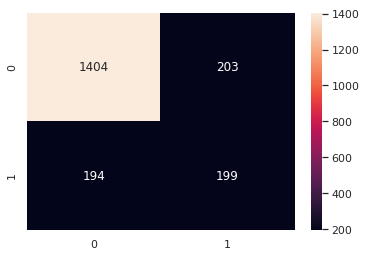

In [97]:
cm_decision_tree_up = confusion_matrix(y_test, tree_predictions_up)

sns.heatmap(cm_decision_tree_up, annot = True, fmt = 'd')

#### Testing the stability of the model by cross_validation on train set

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.843982,0.820034
1,2,0.847297,0.784608
2,3,0.852667,0.813357
3,4,0.838718,0.798685
4,5,0.847359,0.814401
5,Mean,0.846005,0.806217


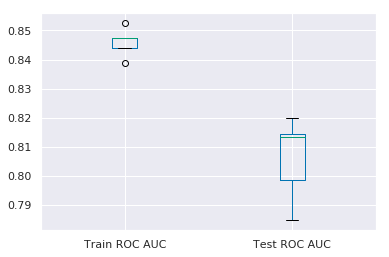

In [98]:
decision_tree_classifier_cv(X_train_res, y_train_res, features, 5)

#### Feeding the model comparison table

In [99]:
decision_tree_result_up= ['decision tree upsampled', precision_decision_tree_up, 
                                    recall_decision_tree_up, f1_score_decision_tree_up,
                                    accuracy_decision_tree_up]

model_comparison.loc[len(model_comparison)] = decision_tree_result_up
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015


### Decision Tree with standarization and upsampling

#### Hypertuning of parameters

In [100]:
# First create the base model to tune
decision_tree_classifier_std_up = DecisionTreeClassifier()

# Using the random grid to search for best hyperparameters
decision_tree_classifier_random_std_up = RandomizedSearchCV(estimator = decision_tree_classifier_std_up, 
                                    param_distributions = random_grid, n_iter = 100, cv = 3, 
                                    verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
decision_tree_classifier_random_std_up.fit(X_train_standarized_upsampled[features], y_train_standarized_upsampled)

decision_tree_best_parameters_std_up = decision_tree_classifier_random_std_up.best_params_
pd.DataFrame(decision_tree_best_parameters_std_up.values(),decision_tree_best_parameters_std_up.keys(),
             columns=['Tuned Parameters'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.8s finished


,Tuned Parameters
min_samples_split,6
min_samples_leaf,1
max_features,21
max_depth,40


In [101]:
# Defining the model
decision_tree_classifier_std_up = DecisionTreeClassifier(min_samples_split= 6,
                                                         min_samples_leaf= 1,
                                                         max_features= 21,
                                                         max_depth= 40,
                                                         random_state=42)
# Training the model with oversampling
decision_tree_classifier_std_up.fit(X_train_standarized_upsampled[features], y_train_standarized_upsampled)

# Predicting on test set:
tree_pred_std_up = decision_tree_classifier_std_up.predict(X_test_standarized[features])

# Printing the classification report 
print(classification_report(y_test, tree_pred_std_up)) 

#Extracting the results
decision_tree_report_std_up = classification_report(y_test, tree_pred_std_up, output_dict=True )
precision_decision_tree_std_up =  decision_tree_report_std_up['macro avg']['precision'] 
recall_decision_tree_std_up = decision_tree_report_std_up['macro avg']['recall']    
f1_score_decision_tree_std_up = decision_tree_report_std_up['macro avg']['f1-score']
accuracy_decision_tree_std_up = decision_tree_report_std_up['accuracy']

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1607
           1       0.44      0.47      0.46       393

    accuracy                           0.78      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.78      0.78      0.78      2000



#### Confusion matrix for Decision Tree standarized and upsampled

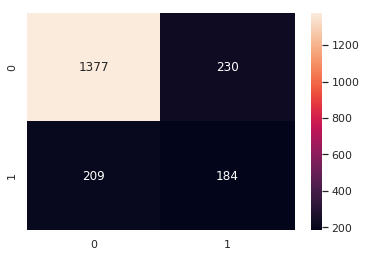

In [102]:
cm_decision_tree_std_up = confusion_matrix(y_test, tree_pred_std_up)

sns.heatmap(cm_decision_tree_std_up, annot = True, fmt = 'd')

#### Testing the stability of the model by cross_validation on train set

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.846302,0.813055
1,2,0.850275,0.786160
2,3,0.851420,0.812432
3,4,0.842871,0.800057
4,5,0.849123,0.813719
5,Mean,0.847998,0.805085


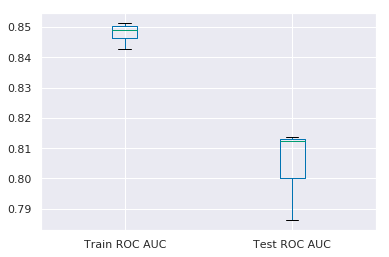

In [103]:
decision_tree_classifier_cv(X_train_standarized_upsampled, y_train_standarized_upsampled, features, 5)

#### Feeding the model comparison table


In [104]:
decision_tree_result_std_up= ['decision tree standarized upsampled', precision_decision_tree_std_up, 
                                    recall_decision_tree_std_up, f1_score_decision_tree_std_up,
                                    accuracy_decision_tree_std_up]

model_comparison.loc[len(model_comparison)] = decision_tree_result_std_up
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805


### Random Forest classifier

#### Hypertuning of parameters

In [105]:
# Creating the parameter grid

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 700, num = 10)]
# Number of features to consider at every split
max_features = list(range(1,X_train[features].shape[1]))
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start= 10, stop= 100, num = 10)]
#min_samples_split
min_samples_split=[int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]     
#min_samples_leaf                       
min_samples_leaf=[int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]                      
                           
# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
#pprint(random_grid)

In [106]:
# Using  random grid to search for best hyperparameters
# First create the base model to tune
random_forest_classifier = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random_forest_classifier_random = RandomizedSearchCV(estimator = random_forest_classifier, 
                                                     param_distributions = random_grid, n_iter = 100, 
                                                     cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
random_forest_classifier_random.fit(X_train[features], y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [107]:
random_forest_classifier_random.best_params_
best_parameters = random_forest_classifier_random.best_params_
pd.DataFrame(best_parameters.values(),best_parameters.keys(),columns=['Tuned Parameters'])

,Tuned Parameters
n_estimators,338
min_samples_split,6
min_samples_leaf,7
max_features,13
max_depth,40


#### The model: Random forest classifier tunned

In [108]:
from sklearn.ensemble import RandomForestClassifier

# Defining the model:
random_forest_classifier_tunned = RandomForestClassifier(n_estimators=627, min_samples_split=8, min_samples_leaf=7,
                                                         max_features= 20, max_depth= 70,  random_state=42)
# Training the model:
random_forest_classifier_tunned.fit(X_train[features], y_train)

# Predicting on test set:
random_tree_pred= random_forest_classifier_tunned.predict(X_test[features])

# Printing the classification report 
print(classification_report(y_test, random_tree_pred)) 

#Extracting the results
random_tree_report = classification_report(y_test, random_tree_pred, output_dict=True )
precision_random_tree =  random_tree_report['macro avg']['precision'] 
recall_random_tree = random_tree_report['macro avg']['recall']    
f1_score_random_tree = random_tree_report['macro avg']['f1-score']
accuracy_random_tree = random_tree_report['accuracy']

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.74      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



#### Confusion matrix for Random Forest

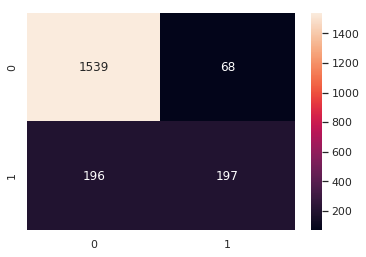

In [109]:
cm_random_tree = confusion_matrix(y_test, random_tree_pred)

sns.heatmap(cm_random_tree, annot = True, fmt = 'd')

#### Testing the stability of the model by cross_validation on train set

In [110]:
def random_forest_classifier_cv(X_train, y_train, features, k):
    train_roc_auc, test_roc_auc, iteration = [], [], []
    i = 1
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    for train, test in kf.split(X_train.index.values):
        # Model    
        random_forest_classifier = RandomForestClassifier(n_estimators=627, min_samples_split=8, min_samples_leaf=7,
                                                         max_features= 20, max_depth= 70,  random_state=42)
        random_forest_classifier.fit(X_train.iloc[train][features],y_train.iloc[train]) 
        #Predictions on train and test set from cross val
        preds_train=random_forest_classifier.predict(X_train.iloc[train][features])
        preds_test = random_forest_classifier.predict(X_train.iloc[test][features])
        train_roc_auc.append(roc_auc_score(y_train.iloc[train], preds_train))
        test_roc_auc.append(roc_auc_score(y_train.iloc[test], preds_test))
        iteration.append(i)
        i+=1  
    columns = {'Iteration': iteration, 'Train ROC AUC': train_roc_auc, 'Test ROC AUC': test_roc_auc}
    results = pd.DataFrame.from_dict(columns)
    results2 = results.drop(['Iteration'], axis=1)
    results2.boxplot()
    results.loc[len(results)] = ["Mean", np.mean(train_roc_auc), np.mean(test_roc_auc)]
    display(results)

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.794671,0.722260
1,2,0.798795,0.714763
2,3,0.796606,0.723047
3,4,0.804563,0.727309
4,5,0.799906,0.721047
5,Mean,0.798908,0.721685


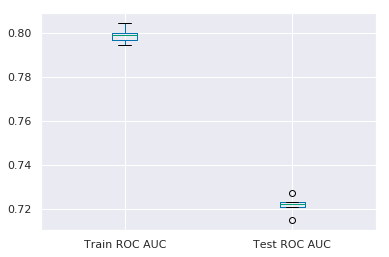

In [111]:
random_forest_classifier_cv(X_train, y_train, features, 5)

#### Feeding the model comparison table

In [112]:
random_tree_result = ['random forest', precision_random_tree, 
                              recall_random_tree, f1_score_random_tree,
                              accuracy_random_tree]

model_comparison.loc[len(model_comparison)] = random_tree_result
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805
6,random forest,0.815214,0.729479,0.759895,0.8680


### Random Forest classifier with upsampling

#### Hypertuning of parameters

In [113]:
# Using the random grid to search for best hyperparameters
# First create the base model to tune
random_forest_classifier_up = RandomForestClassifier()

random_forest_classifier_random_up = RandomizedSearchCV(estimator = random_forest_classifier_up, 
                                                     param_distributions = random_grid, 
                                                     n_iter = 100, cv = 3, verbose=2, random_state=42, 
                                                     n_jobs = -1)

# Fit the random search model
random_forest_classifier_random_up.fit(X_train_res[features], y_train_res)

random_forest_best_parameters_up = random_forest_classifier_random_up.best_params_
pd.DataFrame(random_forest_best_parameters_up.values(),random_forest_best_parameters_up.keys(),columns=['Tuned Parameters'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.2min finished


,Tuned Parameters
n_estimators,555
min_samples_split,3
min_samples_leaf,1
max_features,3
max_depth,90


In [114]:
# Defining the model:
random_forest_classifier_oversampled = RandomForestClassifier(n_estimators=555, min_samples_split=3, min_samples_leaf=1,
                                       max_features= 3, max_depth= 90,  random_state=42)

# Training the model with oversampling:
random_forest_classifier_oversampled.fit(X_train_res[features], y_train_res)

# Predicting on test set:
random_tree_pred_up =random_forest_classifier_oversampled.predict(X_test[features])

# Printing the classification report 
print(classification_report(y_test, random_tree_pred_up)) 

#Extracting the results
random_tree_report_up = classification_report(y_test, random_tree_pred_up, output_dict=True )
precision_random_tree_up= random_tree_report_up['macro avg']['precision'] 
recall_random_tree_up   = random_tree_report_up['macro avg']['recall']    
f1_score_random_tree_up = random_tree_report_up['macro avg']['f1-score']
accuracy_random_tree_up = random_tree_report_up['accuracy']

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67      0.52      0.59       393

    accuracy                           0.86      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



#### Confusion matrix for Random Forest upsampled

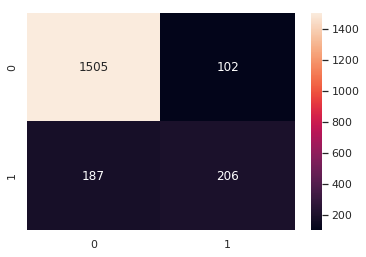

In [115]:
cm_random_tree_up = confusion_matrix(y_test, random_tree_pred_up)

sns.heatmap(cm_random_tree_up, annot = True, fmt = 'd')

#### Testing the stability of the model by cross_validation on train set

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.952909,0.902814
1,2,0.949605,0.867182
2,3,0.952095,0.891182
3,4,0.950136,0.892647
4,5,0.952623,0.891733
5,Mean,0.951473,0.889112


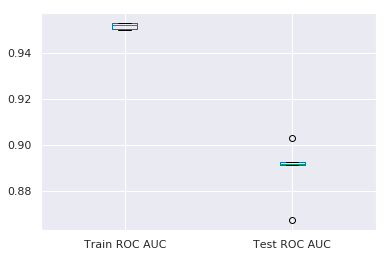

In [116]:
random_forest_classifier_cv(X_train_res, y_train_res, features, 5)

#### Feeding the model comparison table

In [117]:
random_tree_result_up= ['random forest upsampled', precision_random_tree_up, 
                              recall_random_tree_up, f1_score_random_tree_up,
                              accuracy_random_tree_up]

model_comparison.loc[len(model_comparison)] = random_tree_result_up
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805
6,random forest,0.815214,0.729479,0.759895,0.8680
7,random forest upsampled,0.779156,0.730350,0.750065,0.8555


### Random forest classifier with standarization and oversampling

#### Hypertuning of parameters

In [118]:
# Using the random grid to search for best hyperparameters
# First create the base model to tune
random_forest_classifier_std_up = RandomForestClassifier()

random_forest_classifier_random_std_up = RandomizedSearchCV(estimator = random_forest_classifier_std_up, 
                                                     param_distributions = random_grid, 
                                                     n_iter = 100, cv = 3, verbose=2, random_state=42, 
                                                     n_jobs = -1)

# Fit the random search model
random_forest_classifier_random_std_up.fit(X_train_standarized_upsampled[features], y_train_standarized_upsampled)

random_forest_best_parameters_std_up = random_forest_classifier_random_std_up.best_params_
pd.DataFrame(random_forest_best_parameters_std_up.values(),random_forest_best_parameters_std_up.keys(),columns=['Tuned Parameters'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.4min finished


,Tuned Parameters
n_estimators,555
min_samples_split,3
min_samples_leaf,1
max_features,3
max_depth,90


In [119]:
# Defining the model:
random_forest_classifier_std_up = RandomForestClassifier(n_estimators=555, min_samples_split=3, min_samples_leaf=1,
                                       max_features= 3, max_depth= 90,  random_state=42)

# Training the model with oversampling and standarization:
random_forest_classifier_std_up.fit(X_train_standarized_upsampled[features], y_train_standarized_upsampled)

# Predicting on test set:
random_tree_pred_std_up=random_forest_classifier_std_up.predict(X_test_standarized[features])

# Printing the classification report 
print(classification_report(y_test, random_tree_pred_std_up)) 

#Extracting the results
random_tree_report_std_up = classification_report(y_test, random_tree_pred_std_up, output_dict=True )
precision_random_tree_std_up= random_tree_report_std_up['macro avg']['precision'] 
recall_random_tree_std_up   = random_tree_report_std_up['macro avg']['recall']    
f1_score_random_tree_std_up = random_tree_report_std_up['macro avg']['f1-score']
accuracy_random_tree_std_up= random_tree_report_std_up['accuracy']

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.67      0.53      0.59       393

    accuracy                           0.86      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



#### Confusion matrix for Random Tree standarized and upsampled

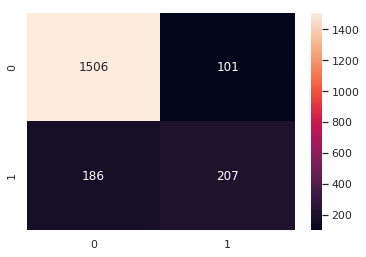

In [120]:
cm_random_tree_std_up = confusion_matrix(y_test, random_tree_pred_std_up)

sns.heatmap(cm_random_tree_std_up, annot = True, fmt = 'd')

#### Testing the stability of the model by cross_validation on train set

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.952417,0.902814
1,2,0.950199,0.869574
2,3,0.951997,0.891182
3,4,0.949820,0.885556
4,5,0.951740,0.892545
5,Mean,0.951235,0.888334


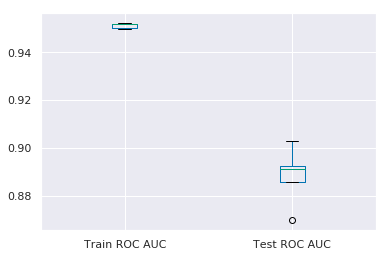

In [121]:
random_forest_classifier_cv(X_train_standarized_upsampled, y_train_standarized_upsampled, features, 5)

#### Feeding the model comparison table

In [122]:
random_tree_result_std_up= ['random forest standarized upsampled', precision_random_tree_std_up, 
                        recall_random_tree_std_up, f1_score_random_tree_std_up,
                        accuracy_random_tree_std_up]

model_comparison.loc[len(model_comparison)] = random_tree_result_std_up
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805
6,random forest,0.815214,0.729479,0.759895,0.8680
7,random forest upsampled,0.779156,0.730350,0.750065,0.8555
8,random forest standarized upsampled,0.781074,0.731934,0.751794,0.8565


### Suport Vector Machines- SVM

#### Hypertuning of parameters

In [123]:
kernel = ['linear', 'rbf', 'poly']

# Creating the random grid
random_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}  

#pprint(random_grid)

In [124]:
from sklearn.svm import SVC
# Using  random grid to search for best hyperparameters
# First create the base model to tune
svm_classifier = SVC(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random_svm = RandomizedSearchCV(estimator = svm_classifier, param_distributions = random_grid, n_iter = 100, 
                                cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
random_svm.fit(X_train[features], y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 25 is smaller than n_iter=100. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=42,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [125]:
random_svm.best_params_
best_parameters = random_svm.best_params_
pd.DataFrame(best_parameters.values(),best_parameters.keys(),columns=['Tuned Parameters'])

,Tuned Parameters
gamma,1.0
C,0.1


#### The model: SVC classifier tunned

In [126]:
from sklearn.svm import SVC

# Defining the model: SVM
svm_tunned = SVC(gamma=1, C=0.1 ,random_state=42)

# Training the model:
svm_tunned.fit(X_train[features], y_train)

# Predicting on test set:
svm_pred=svm_tunned.predict(X_test[features])

# Printing the classification report 
print(classification_report(y_test, svm_pred)) 

#Extracting the results
svm_report = classification_report(y_test, svm_pred, output_dict=True )
precision_svm= svm_report['macro avg']['precision'] 
recall_svm   = svm_report['macro avg']['recall']    
f1_score_svm = svm_report['macro avg']['f1-score']
accuracy_svm= svm_report['accuracy']

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Confusion matrix for SVC

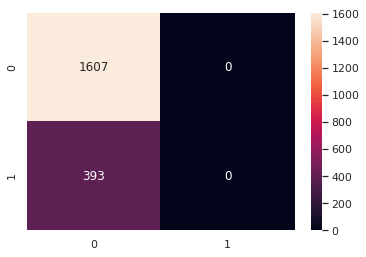

In [127]:
cm_svm = confusion_matrix(y_test, svm_pred)

sns.heatmap(cm_svm, annot = True, fmt = 'd')

#### Testing the stability of the model by cross_validation on train set

In [128]:
def svm_cv(X_train, y_train, features, k):
    train_roc_auc, test_roc_auc, iteration = [], [], []
    i = 1
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    for train, test in kf.split(X_train.index.values):
        # Model    
        svm_classifier = SVC(gamma=1, C=0.1 ,random_state=45)
        svm_classifier.fit(X_train.iloc[train][features], y_train.iloc[train]) 
        #Predictions on train and test set from cross val
        preds_train= svm_classifier.predict(X_train.iloc[train][features])
        preds_test = svm_classifier.predict(X_train.iloc[test][features])
        train_roc_auc.append(roc_auc_score(y_train.iloc[train], preds_train))
        test_roc_auc.append(roc_auc_score(y_train.iloc[test], preds_test))
        iteration.append(i)
        i+=1  
    columns = {'Iteration': iteration, 'Train ROC AUC': train_roc_auc, 'Test ROC AUC': test_roc_auc}
    results = pd.DataFrame.from_dict(columns)
    results2 = results.drop(['Iteration'], axis=1)
    results2.boxplot()
    results.loc[len(results)] = ["Mean", np.mean(train_roc_auc), np.mean(test_roc_auc)]
    display(results)

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.5,0.5
1,2,0.5,0.5
2,3,0.5,0.5
3,4,0.5,0.5
4,5,0.5,0.5
5,Mean,0.5,0.5


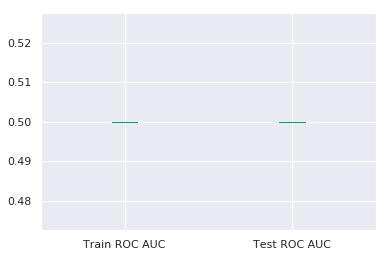

In [129]:
svm_cv(X_train, y_train, features, 5)

#### Feeding the model comparison table

In [130]:
svm_result= ['svm', precision_svm, recall_svm, f1_score_svm, accuracy_svm]

model_comparison.loc[len(model_comparison)] = svm_result
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805
6,random forest,0.815214,0.729479,0.759895,0.8680
7,random forest upsampled,0.779156,0.730350,0.750065,0.8555
8,random forest standarized upsampled,0.781074,0.731934,0.751794,0.8565
9,svm,0.401750,0.500000,0.445523,0.8035


### SVM with upsampling

#### Hypertuning of parameters

In [131]:
# Using the random grid to search for best hyperparameters

# First create the base model to tune
svm_classifier_up = SVC(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random_svm_up = RandomizedSearchCV(estimator = svm_classifier_up, param_distributions = random_grid, n_iter = 100, 
                                cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
random_svm_up.fit(X_train_res[features], y_train_res)

random_svm_best_parameters_up = random_svm_up.best_params_
pd.DataFrame(random_svm_best_parameters_up.values(),random_svm_best_parameters_up.keys(),columns=['Tuned Parameters'])

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 25 is smaller than n_iter=100. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.7min finished


,Tuned Parameters
gamma,1
C,1


In [132]:
# Defining the model:
svm_up = SVC(gamma=1, C=1 ,random_state=42)

# Training the model with upsampling:
svm_up.fit(X_train_res[features], y_train_res)

# Predicting on test set:
svm_pred_up =svm_up.predict(X_test[features])

# Printing the classification report 
print(classification_report(y_test, svm_pred_up)) 

#Extracting the results
svm_report_up = classification_report(y_test, svm_pred_up, output_dict=True )
precision_svm_up = svm_report_up['macro avg']['precision'] 
recall_svm_up   = svm_report_up['macro avg']['recall']    
f1_score_svm_up = svm_report_up['macro avg']['f1-score']
accuracy_svm_up= svm_report_up['accuracy']

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Confusion matrix for SVM upsampled

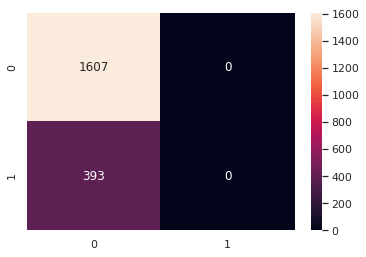

In [133]:
cm_svm_up = confusion_matrix(y_test, svm_pred_up)

sns.heatmap(cm_svm_up, annot = True, fmt = 'd')

#### Testing the stability of the model by cross_validation on train set

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.500000,0.5
1,2,0.500000,0.5
2,3,0.500000,0.5
3,4,0.500992,0.5
4,5,0.500000,0.5
5,Mean,0.500198,0.5


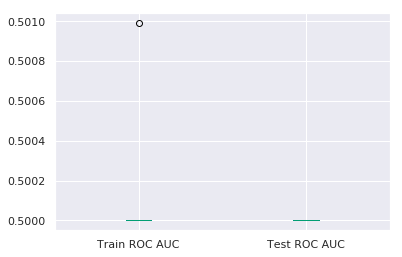

In [134]:
svm_cv(X_train_res, y_train_res, features, 5)

#### Feeding the model comparison table

In [135]:
svm_result_up= ['svm upsampled', precision_svm_up, recall_svm_up, f1_score_svm_up, accuracy_svm_up]

model_comparison.loc[len(model_comparison)] = svm_result_up
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805
6,random forest,0.815214,0.729479,0.759895,0.8680
7,random forest upsampled,0.779156,0.730350,0.750065,0.8555
8,random forest standarized upsampled,0.781074,0.731934,0.751794,0.8565
9,svm,0.401750,0.500000,0.445523,0.8035


### SVM with standarized and upsampled

#### Hypertuning of parameters

In [136]:
# Using the random grid to search for best hyperparameters

# First create the base model to tune
svm_classifier_std_up = SVC(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random_svm_std_up = RandomizedSearchCV(estimator = svm_classifier_std_up, param_distributions = random_grid, n_iter = 100, 
                                cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
random_svm_std_up.fit(X_train_standarized_upsampled[features], y_train_standarized_upsampled)

random_svm_best_parameters_std_up = random_svm_std_up.best_params_
pd.DataFrame(random_svm_best_parameters_std_up.values(),
             random_svm_best_parameters_std_up.keys(),columns=['Tuned Parameters'])

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 25 is smaller than n_iter=100. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  3.6min finished


,Tuned Parameters
gamma,1
C,10


In [137]:
# Defining the model:
svm_classifier_std_up = SVC(gamma=1, C=10 ,random_state=42)

# Training the model with oversampling:
svm_classifier_std_up.fit(X_train_standarized_upsampled[features], y_train_standarized_upsampled)

# Predicting:
svm_pred_std_up=svm_classifier_std_up.predict(X_test_standarized[features])

# Printing the classification report 
print(classification_report(y_test, svm_pred_std_up)) 

#Extracting the results
svm_report_std_up = classification_report(y_test, svm_pred_std_up, output_dict=True )
precision_svm_std_up = svm_report_std_up['macro avg']['precision'] 
recall_svm_std_up   = svm_report_std_up['macro avg']['recall']    
f1_score_svm_std_up = svm_report_std_up['macro avg']['f1-score']
accuracy_svm_std_up= svm_report_std_up['accuracy']

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1607
           1       0.47      0.22      0.30       393

    accuracy                           0.80      2000
   macro avg       0.65      0.58      0.59      2000
weighted avg       0.76      0.80      0.77      2000



#### Confusion matrix for SVM standarized and upsampled

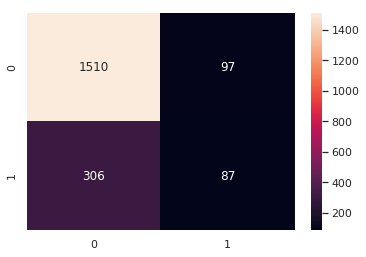

In [138]:
cm_svm_std_up = confusion_matrix(y_test, svm_pred_std_up)

sns.heatmap(cm_svm_std_up, annot = True, fmt = 'd')

#### Testing the stability of the model by cross_validation on train set

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.904804,0.768988
1,2,0.930004,0.789994
2,3,0.940845,0.852020
3,4,0.943613,0.887654
4,5,0.949394,0.895661
5,Mean,0.933732,0.838864


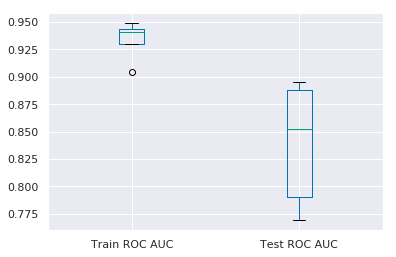

In [139]:
svm_cv(X_train_standarized_upsampled, y_train_standarized_upsampled, features, 5)

#### Feeding the model comparison table

In [140]:
svm_result_std_up= ['svm standarized upsampled', precision_svm_std_up, 
                    recall_svm_std_up, f1_score_svm_std_up, accuracy_svm_std_up]

model_comparison.loc[len(model_comparison)] = svm_result_std_up
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805
6,random forest,0.815214,0.729479,0.759895,0.8680
7,random forest upsampled,0.779156,0.730350,0.750065,0.8555
8,random forest standarized upsampled,0.781074,0.731934,0.751794,0.8565
9,svm,0.401750,0.500000,0.445523,0.8035


### XG-boost 

#### Hypertuning of parameters done before on feature importance

In [141]:
# Defining the model: Xg-boost
xg_boost_tunned= xgb.XGBClassifier(n_estimators=50, max_depth=20, random_state=42)

#Training the model:
xg_boost_tunned.fit(X_train[features], y_train)

#Predicting:
xg_boost_pred=xg_boost_tunned.predict(X_test[features])

# Printing the classification report 
print(classification_report(y_test, xg_boost_pred)) 

#Extracting the results
xg_boost_report = classification_report(y_test, xg_boost_pred, output_dict=True )
precision_xg_boost = xg_boost_report['macro avg']['precision'] 
recall_xg_boost   = xg_boost_report['macro avg']['recall']    
f1_score_xg_boost = xg_boost_report['macro avg']['f1-score']
accuracy_xg_boost= xg_boost_report['accuracy']

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.50      0.58       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



#### Confusion matrix for XgBoost

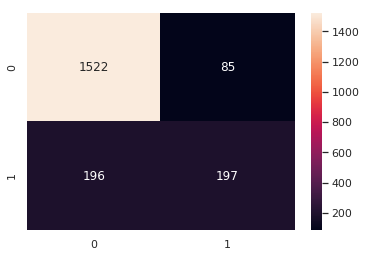

In [142]:
cm_xg_boost = confusion_matrix(y_test, xg_boost_pred)

sns.heatmap(cm_xg_boost, annot = True, fmt = 'd')

#### Testing the stability of the model by cross_validation on train set

In [143]:
def score_xg_boost_cv(X_train, y_train, features, k):
    train_roc_auc, test_roc_auc, iteration = [], [], []
    i = 1
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    for train, test in kf.split(X_train.index.values):
        # Model    
        xg_boost_ = xgb.XGBClassifier(n_estimators=50, max_depth=20, random_state=45)
        xg_boost_.fit(X_train.iloc[train][features],y_train.iloc[train]) 
        #Predictions on train and test set from cross val
        preds_train=xg_boost_.predict(X_train.iloc[train][features])
        preds_test = xg_boost_.predict(X_train.iloc[test][features])
        train_roc_auc.append(roc_auc_score(y_train.iloc[train], preds_train))
        test_roc_auc.append(roc_auc_score(y_train.iloc[test], preds_test))
        iteration.append(i)
        i+=1  
    columns = {'Iteration': iteration, 'Train ROC AUC': train_roc_auc, 'Test ROC AUC': test_roc_auc}
    results = pd.DataFrame.from_dict(columns)
    results2 = results.drop(['Iteration'], axis=1)
    results2.boxplot()
    results.loc[len(results)] = ["Mean", np.mean(train_roc_auc), np.mean(test_roc_auc)]
    display(results)

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.988034,0.722920
1,2,0.986795,0.708290
2,3,0.993089,0.725324
3,4,0.988748,0.729540
4,5,0.990580,0.714216
5,Mean,0.989449,0.720058


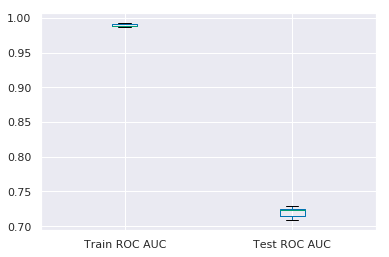

In [144]:
score_xg_boost_cv(X_train, y_train, features, 5)

#### Feeding the model comparison table

In [145]:
xg_boost_result= ['XgBoost', precision_xg_boost, 
                    recall_xg_boost, f1_score_xg_boost, accuracy_xg_boost]

model_comparison.loc[len(model_comparison)] = xg_boost_result
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805
6,random forest,0.815214,0.729479,0.759895,0.8680
7,random forest upsampled,0.779156,0.730350,0.750065,0.8555
8,random forest standarized upsampled,0.781074,0.731934,0.751794,0.8565
9,svm,0.401750,0.500000,0.445523,0.8035


### Xg-boost with upsampling

#### Hypertuning of parameters

In [146]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 700, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start=10, stop=100, num = 10)]
# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}
#pprint(random_grid)

In [147]:
# Using the random grid to search for best hyperparameters
# First creating the base model to tune
xg_boost_up = xgb.XGBClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xg_boost_random_up = RandomizedSearchCV(estimator = xg_boost_up, param_distributions = random_grid, n_iter = 20, 
                                     cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
xg_boost_random_up.fit(X_train_res, y_train_res)

xg_boost_up_best_parameters_up = xg_boost_random_up.best_params_
pd.DataFrame(xg_boost_up_best_parameters_up.values(),xg_boost_up_best_parameters_up.keys(),columns=['Tuned Parameters'])

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  7.7min finished


,Tuned Parameters
n_estimators,411
max_features,sqrt
max_depth,10


In [148]:
# Defining the model: Xg-boost
xg_boost_tunned_up= xgb.XGBClassifier(n_estimators=411, max_features='sqrt' ,max_depth=10, random_state=42)

#Training the model:
xg_boost_tunned_up.fit(X_train_res[features], y_train_res)

#Predicting:
xg_boost_pred_up=xg_boost_tunned_up.predict(X_test[features])

# Printing the classification report 
print(classification_report(y_test, xg_boost_pred_up)) 

#Extracting the results
xg_boost_report_up = classification_report(y_test, xg_boost_pred_up, output_dict=True )
precision_xg_boost_up = xg_boost_report_up['macro avg']['precision'] 
recall_xg_boost_up   = xg_boost_report_up['macro avg']['recall']    
f1_score_xg_boost_up = xg_boost_report_up['macro avg']['f1-score']
accuracy_xg_boost_up = xg_boost_report_up['accuracy']

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1607
           1       0.63      0.56      0.59       393

    accuracy                           0.85      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.84      0.85      0.85      2000



#### Confusion matrix for XgBoost

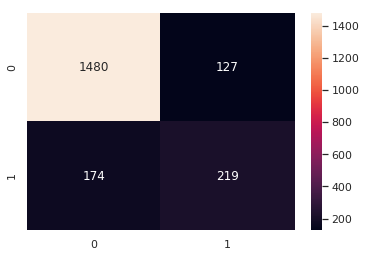

In [149]:
cm_xg_boost_up = confusion_matrix(y_test, xg_boost_pred_up)

sns.heatmap(cm_xg_boost_up, annot = True, fmt = 'd')

#### Testing the stability of the model by cross_validation on train set

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.998814,0.947098
1,2,0.998129,0.925985
2,3,0.999114,0.938099
3,4,0.998728,0.946019
4,5,0.998723,0.938026
5,Mean,0.998701,0.939046


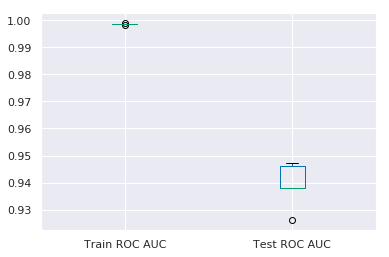

In [150]:
score_xg_boost_cv(X_train_res, y_train_res, features, 5)

#### Feeding the model comparison table

In [151]:
xg_boost_result_up= ['XgBoost upsampled', precision_xg_boost_up, 
                    recall_xg_boost_up, f1_score_xg_boost_up, accuracy_xg_boost_up]

model_comparison.loc[len(model_comparison)] = xg_boost_result_up
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805
6,random forest,0.815214,0.729479,0.759895,0.8680
7,random forest upsampled,0.779156,0.730350,0.750065,0.8555
8,random forest standarized upsampled,0.781074,0.731934,0.751794,0.8565
9,svm,0.401750,0.500000,0.445523,0.8035


### Xg-boost standarized with upsampling

#### Hypertuning of parameters

In [152]:
# Using the random grid to search for best hyperparameters

# First creating the base model to tune
xg_boost_std_up = xgb.XGBClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xg_boost_random_std_up = RandomizedSearchCV(estimator = xg_boost_std_up, param_distributions = random_grid, n_iter = 20, 
                                     cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
xg_boost_random_std_up.fit(X_train_standarized_upsampled[features], y_train_standarized_upsampled)

xg_boost_best_parameters_std_up = xg_boost_random_std_up.best_params_
pd.DataFrame(xg_boost_best_parameters_std_up.values(),xg_boost_best_parameters_std_up.keys(),columns=['Tuned Parameters'])

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.9min finished


,Tuned Parameters
n_estimators,338
max_features,sqrt
max_depth,90


In [153]:
# Defining the model: Xg-boost
xg_boost_tunned_std_up= xgb.XGBClassifier(n_estimators=338, max_features='sqrt', max_depth=90, random_state=42)

#Training the model:
xg_boost_tunned_std_up.fit(X_train_standarized_upsampled[features], y_train_standarized_upsampled)

#Predicting:
xg_boost_pred_std_up=xg_boost_tunned_up.predict(X_test_standarized[features])

# Printing the classification report 
print(classification_report(y_test, xg_boost_pred_std_up)) 

#Extracting the results
xg_boost_report_std_up = classification_report(y_test, xg_boost_pred_std_up, output_dict=True )
precision_xg_boost_std_up = xg_boost_report_std_up['macro avg']['precision'] 
recall_xg_boost_std_up  = xg_boost_report_std_up['macro avg']['recall']    
f1_score_xg_boost_std_up = xg_boost_report_std_up['macro avg']['f1-score']
accuracy_xg_boost_std_up = xg_boost_report_std_up['accuracy']

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1607
           1       0.30      0.30      0.30       393

    accuracy                           0.73      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.72      0.73      0.72      2000



#### Confusion matrix for XgBoost


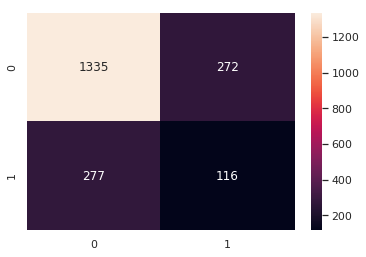

In [154]:
cm_xg_boost_std_up = confusion_matrix(y_test, xg_boost_pred_std_up)

sns.heatmap(cm_xg_boost_std_up, annot = True, fmt = 'd')

#### Testing the stability of the model by cross_validation on train set

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.998814,0.947098
1,2,0.998129,0.925985
2,3,0.999114,0.938099
3,4,0.998728,0.946019
4,5,0.998723,0.938026
5,Mean,0.998701,0.939046


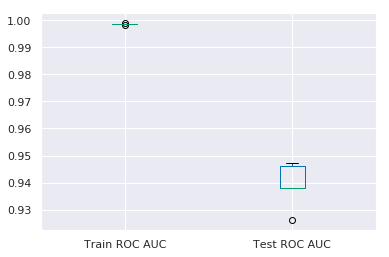

In [155]:
score_xg_boost_cv(X_train_standarized_upsampled, y_train_standarized_upsampled, features, 5)

#### Feeding the model comparison table

In [156]:
xg_boost_result_std_up= ['XgBoost standarized upsampled', precision_xg_boost_std_up, 
                    recall_xg_boost_std_up, f1_score_xg_boost_std_up, accuracy_xg_boost_std_up]

model_comparison.loc[len(model_comparison)] = xg_boost_result_std_up
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805
6,random forest,0.815214,0.729479,0.759895,0.8680
7,random forest upsampled,0.779156,0.730350,0.750065,0.8555
8,random forest standarized upsampled,0.781074,0.731934,0.751794,0.8565
9,svm,0.401750,0.500000,0.445523,0.8035


## Neural Networks

Neural networks are brain-inspired that consist of input and output layers, and a hidden layer consisting of units that transform the input into something the output layer can use.

ANNs have three layers interconnected. 
- The first layer consists of input neurons that send data on to the second layer
- The second layer, similarly sends the output neurons to the third layer

ANN is rarely used for predictive modelling. The reason is that it usually tries to over-fit the relationship. ANN is generally used in cases where what has happened in past is repeated almost exactly in same way.

Note that:
__A Neural Network without Activation function would simply be a Linear regression Model__

##### Keras library

In [157]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense #Dense module is for the layers

For this we will be using 'adam' that is a combination of RMSprop and Stochastic Gradient Descent with momentum. It uses the squared gradients to scale the learning rate like RMSprop and it takes advantage of momentum by using moving average of the gradient instead of gradient itself like SGD with momentum. 

I will be adding a callback following classmates advice, previously the results of the Ann were :

 Ann	0.398750	0.500000	0.443672	0.7975

So Lets see if it will improve the results

aka: an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks

In [158]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In here wee wanted to monitor the test loss at each epoch. After the test loss has not improved after two epochs, the training will be interrupted

Note: Since we set patience=2, we won’t get the best model, but the model two epochs after the best model. Therefore, optionally, we can include a second operation, ModelCheckpoint which saves the model to a file after every checkpoint 

In [159]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Initializing the model
ann = Sequential()

# Adding the input layer and the first hidden layer
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))


# Adding the second hidden layer
ann.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))


# Adding the output layer
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying Stochastic Gradient Descent on ann
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the model:
ann.fit(X_train[features], y_train, batch_size = 10, epochs = 100, verbose = 0, callbacks=callbacks)

#Predicting
y_pred_ann= ann.predict(X_test[features])

# Printing the classification report 
#As y_pred_ann is continuous and our target variable is binary, to follow the results are compared to boolean values:
y_pred_ann_bin=(y_pred_ann>0.5)

print(classification_report(y_test, y_pred_ann_bin)) 

#Extracting the results
ann_report = classification_report(y_test, y_pred_ann_bin, output_dict=True )
precision_ann = ann_report['macro avg']['precision'] 
recall_ann  = ann_report['macro avg']['recall']    
f1_score_ann = ann_report['macro avg']['f1-score']
accuracy_ann = ann_report['accuracy']

/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Confusion matrix for Ann

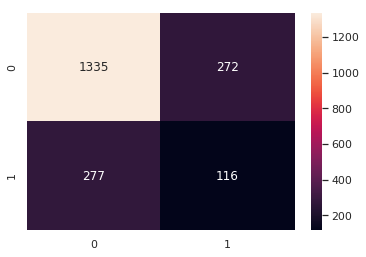

In [160]:
cm_ann = confusion_matrix(y_test, y_pred_ann_bin)

sns.heatmap(cm_xg_boost_std_up, annot = True, fmt = 'd')

#### ROC curve

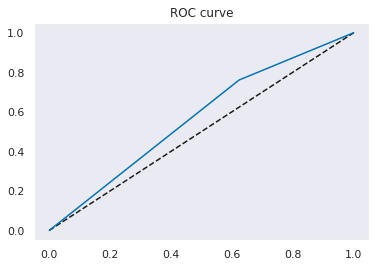

In [161]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ann)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.title('ROC curve')
plt.show()

#### Testing the stability of the ANN on train set

In [162]:
def ann_cv(X_train, y_train, features, k):
    train_roc_auc, test_roc_auc, iteration = [], [], []
    i = 1
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    for train, test in kf.split(X_train.index.values):
        
        ann_ = Sequential()
        # Model    
        ann_.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))

        # Adding the second hidden layer
        ann_.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

        # Adding the output layer
        ann_.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
        
        #Predictions on train and test set from cross val
        preds_train=ann_.predict(X_train.iloc[train][features])
        preds_test = ann_.predict(X_train.iloc[test][features])
        train_roc_auc.append(roc_auc_score(y_train.iloc[train], preds_train))
        test_roc_auc.append(roc_auc_score(y_train.iloc[test], preds_test))
        iteration.append(i)
        i+=1  
    columns = {'Iteration': iteration, 'Train ROC AUC': train_roc_auc, 'Test ROC AUC': test_roc_auc}
    results = pd.DataFrame.from_dict(columns)
    results2 = results.drop(['Iteration'], axis=1)
    results2.boxplot()
    results.loc[len(results)] = ["Mean", np.mean(train_roc_auc), np.mean(test_roc_auc)]
    display(results)

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.424632,0.415491
1,2,0.418190,0.437369
2,3,0.482891,0.478744
3,4,0.544419,0.560064
4,5,0.496113,0.487771
5,Mean,0.473249,0.475888


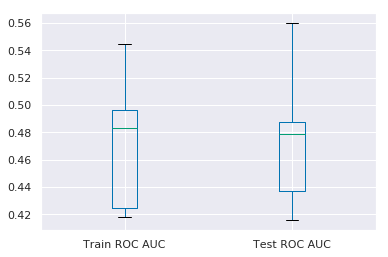

In [163]:
ann_cv(X_train, y_train, features, 5)

#### Feeding the model comparison table

In [164]:
ann_result= ['Ann', precision_ann, recall_ann, f1_score_ann, accuracy_ann]

model_comparison.loc[len(model_comparison)] = ann_result
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805
6,random forest,0.815214,0.729479,0.759895,0.8680
7,random forest upsampled,0.779156,0.730350,0.750065,0.8555
8,random forest standarized upsampled,0.781074,0.731934,0.751794,0.8565
9,svm,0.401750,0.500000,0.445523,0.8035


### Neural network with Oversampling

In [165]:
# Initializing the model
ann_up = Sequential()

# Adding the input layer and the first hidden layer
ann_up.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))

# Adding the second hidden layer
ann_up.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
ann_up.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying Stochastic Gradient Descent on ann
ann_up.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the model:
ann_up.fit(X_train_res[features], y_train_res, batch_size = 10, epochs = 100, verbose = 0, callbacks=callbacks)

#Predicting
y_pred_ann_up= ann_up.predict(X_test[features])

# Printing the classification report 
#As y_pred_ann is continuous and our target variable is binary, to follow the results are compared to boolean values:
y_pred_ann_bin_up=(y_pred_ann_up>0.5)

print(classification_report(y_test, y_pred_ann_bin_up)) 

#Extracting the results
ann_report_up = classification_report(y_test, y_pred_ann_bin_up, output_dict=True )
precision_ann_up = ann_report_up['macro avg']['precision'] 
recall_ann_up  = ann_report_up['macro avg']['recall']    
f1_score_ann_up = ann_report_up['macro avg']['f1-score']
accuracy_ann_up = ann_report_up['accuracy']

/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


              precision    recall  f1-score   support

           0       0.86      0.38      0.52      1607
           1       0.23      0.76      0.35       393

    accuracy                           0.45      2000
   macro avg       0.55      0.57      0.44      2000
weighted avg       0.74      0.45      0.49      2000



#### Confusion matrix for Ann

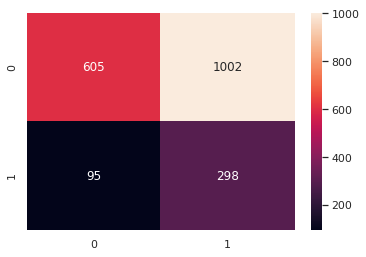

In [166]:
cm_ann_up = confusion_matrix(y_test, y_pred_ann_bin_up)

sns.heatmap(cm_ann_up, annot = True, fmt = 'd')

#### Testing the stability of the ANN in the train set

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.429671,0.417265
1,2,0.505712,0.516634
2,3,0.443135,0.436390
3,4,0.577379,0.558147
4,5,0.468968,0.463573
5,Mean,0.484973,0.478402


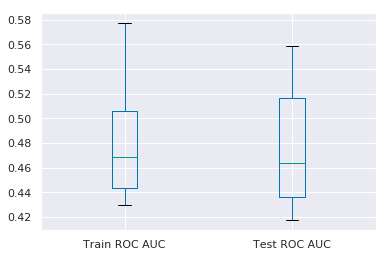

In [167]:
ann_cv(X_train_res, y_train_res, features, 5)

#### Feeding the model comparison table

In [168]:
ann_result_up= ['Ann upsampled', precision_ann_up, recall_ann_up, f1_score_ann_up, accuracy_ann_up]

model_comparison.loc[len(model_comparison)] = ann_result_up
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805
6,random forest,0.815214,0.729479,0.759895,0.8680
7,random forest upsampled,0.779156,0.730350,0.750065,0.8555
8,random forest standarized upsampled,0.781074,0.731934,0.751794,0.8565
9,svm,0.401750,0.500000,0.445523,0.8035


### Neural networks standarized and upsampled

In [169]:
# Initializing the model
ann_std_up = Sequential()

# Adding the input layer and the first hidden layer
ann_std_up.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))

# Adding the second hidden layer
ann_std_up.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
ann_std_up.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying Stochastic Gradient Descent on ann
ann_std_up.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the model:
ann_std_up.fit(X_train_standarized_upsampled[features], y_train_standarized_upsampled, batch_size = 10, epochs = 100, verbose = 0, callbacks=callbacks)

#Predicting
y_pred_ann_std_up= ann_std_up.predict(X_test_standarized[features])

# Printing the classification report 
#As y_pred_ann is continuous and our target variable is binary, to follow the results are compared to boolean values:
y_pred_ann_bin_std_up=(y_pred_ann_std_up>0.5)

print(classification_report(y_test, y_pred_ann_bin_std_up)) 

#Extracting the results
ann_report_std_up = classification_report(y_test, y_pred_ann_bin_std_up, output_dict=True )
precision_ann_std_up = ann_report_std_up['macro avg']['precision'] 
recall_ann_std_up  = ann_report_std_up['macro avg']['recall']    
f1_score_ann_std_up = ann_report_std_up['macro avg']['f1-score']
accuracy_ann_std_up = ann_report_std_up['accuracy']

/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1607
           1       0.45      0.78      0.57       393

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.84      0.77      0.79      2000



#### Confusion matrix for Ann

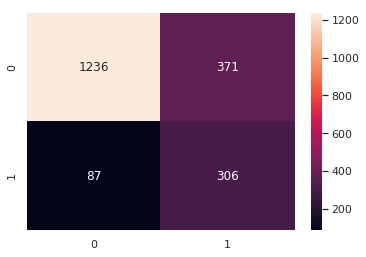

In [170]:
cm_ann_std_up = confusion_matrix(y_test, y_pred_ann_bin_std_up)

sns.heatmap(cm_ann_std_up, annot = True, fmt = 'd')

#### ROC curve

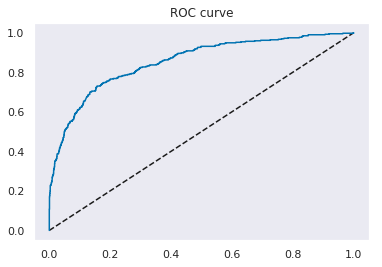

In [171]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ann_std_up)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.title('ROC curve')
plt.show()

#### Testing the stability of the ANN on train set

,Iteration,Train ROC AUC,Test ROC AUC
0,1,0.481407,0.485338
1,2,0.573754,0.562129
2,3,0.462128,0.466210
3,4,0.374258,0.394663
4,5,0.430731,0.419199
5,Mean,0.464455,0.465508


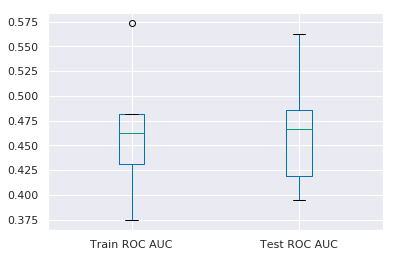

In [172]:
ann_cv(X_train_standarized_upsampled, y_train_standarized_upsampled, features, 5)

#### Feeding the model comparison table

In [173]:
ann_result_std_up= ['Ann standarized upsampled', precision_ann_std_up, recall_ann_std_up, 
                    f1_score_ann_std_up, accuracy_ann_std_up]

model_comparison.loc[len(model_comparison)] = ann_result_std_up
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805
6,random forest,0.815214,0.729479,0.759895,0.8680
7,random forest upsampled,0.779156,0.730350,0.750065,0.8555
8,random forest standarized upsampled,0.781074,0.731934,0.751794,0.8565
9,svm,0.401750,0.500000,0.445523,0.8035


### Improving our ANN

#### Tuning our ANN 

In this section we will be trying values for the batch size. According to kaggle advice this are likely to be powers of 2, so we will be trying 9, 25 and 32

In [174]:
# Tuning the ANN
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [9 , 25, 32],
              'epochs': [100, 200],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)

In [175]:
grid_search = grid_search.fit(X_train[features], y_train, verbose = 0)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [176]:
print('Best parameters after tuning are: {}'.format(best_parameters))
print('Best accuracy after tuning is: {}'.format(best_accuracy))

Best parameters after tuning are: {'batch_size': 9, 'epochs': 100, 'optimizer': 'adam'}
Best accuracy after tuning is: 0.7945


## Ensemble boosting model: AdaBoost 

Note: AdaBoost uses Decision Tree Classifier as default Classifier, but in this case we will try to contrast the results obtained by running AdaBoost with Suport Vector Classifier that in general was outperformed. 
Eventhough AdaBoost is considerably slower than his brother XgBoost, we wanted to try AdaBoost because it is not prone to overfitting

As SVC doesnt account for probabilities required for AdaBoost the turnaround  is to define  probabilities and use a linear kernel

In [177]:
from sklearn.ensemble import AdaBoostClassifier

# Defining the model: Ada-Boost
svc=SVC(probability=True, kernel='linear')
ada_boost = AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,random_state=42)

#Training the model:
ada_boost.fit(X_train_standarized_upsampled[features], y_train_standarized_upsampled)

#Predicting:
ada_boost_pred=ada_boost.predict(X_test_standarized[features])

# Printing the classification report 
print(classification_report(y_test, ada_boost_pred)) 

#Extracting the results
ada_boost_report = classification_report(y_test, ada_boost_pred, output_dict=True )
precision_ada_boost = ada_boost_report['macro avg']['precision'] 
recall_ada_boost  = ada_boost_report['macro avg']['recall']    
f1_score_ada_boost = ada_boost_report['macro avg']['f1-score']
accuracy_ada_boost = ada_boost_report['accuracy']

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1607
           1       0.26      0.31      0.28       393

    accuracy                           0.69      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.71      0.69      0.70      2000



#### Confusion matrix for AdaBoost

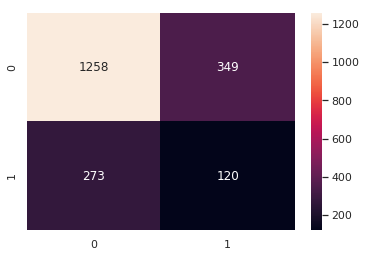

In [178]:
cm_ada_boost = confusion_matrix(y_test, ada_boost_pred)

sns.heatmap(cm_ada_boost, annot = True, fmt = 'd')

#### Feeding the model comparison table

In [179]:
ada_boost_result= ['AdaBoost standarized upsampled', precision_ada_boost, recall_ada_boost, 
                    f1_score_ada_boost, accuracy_ada_boost]

model_comparison.loc[len(model_comparison)] = ada_boost_result
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805
6,random forest,0.815214,0.729479,0.759895,0.8680
7,random forest upsampled,0.779156,0.730350,0.750065,0.8555
8,random forest standarized upsampled,0.781074,0.731934,0.751794,0.8565
9,svm,0.401750,0.500000,0.445523,0.8035


### Ensemble model: Weighted Average

As averaging models presents the flaw that most of the time one model has more predictive power than another and disregards this, weighted average models give  more weight to the best models on the final predictions.

In [180]:
from sklearn.base import BaseEstimator, TransformerMixin, clone, RegressorMixin
class WeightedAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models, weights):
        self.models = models
        self.weights = weights
        assert sum(self.weights)==1
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.sum(predictions*self.weights, axis=1)

In [181]:
# Defining the model: Weighted Average
weighted_average_ = WeightedAveragedModels([decision_tree_classifier_up, svm_classifier_std_up, xg_boost_tunned_up],
                                           [0.4, 0.4, 0.2])

#Training the model:
weighted_average_.fit(X_train_standarized_upsampled[features], y_train_standarized_upsampled)

#Predicting:
weighted_average_pred = weighted_average_.predict(X_test_standarized[features])

#As weighted_average_pred is continuous and our target variable is binary, to follow the results are compared to boolean values:
weighted_average_pred_bin=(weighted_average_pred>0.5)


# Printing the classification report 
print(classification_report(y_test, weighted_average_pred_bin)) 

#Extracting the results
weighted_average_report = classification_report(y_test, weighted_average_pred_bin, output_dict=True )
precision_weighted_average = weighted_average_report['macro avg']['precision'] 
recall_weighted_average  = weighted_average_report['macro avg']['recall']    
f1_score_weighted_average = weighted_average_report['macro avg']['f1-score']
accuracy_weighted_average = weighted_average_report['accuracy']

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1607
           1       0.64      0.44      0.52       393

    accuracy                           0.84      2000
   macro avg       0.76      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



#### Confusion matrix for Weighted Average

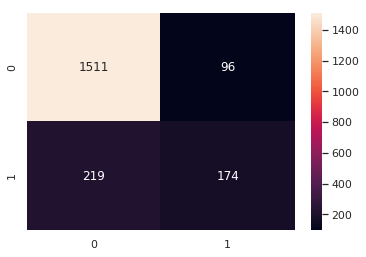

In [182]:
cm_weighted_average = confusion_matrix(y_test, weighted_average_pred_bin)

sns.heatmap(cm_weighted_average, annot = True, fmt = 'd')

#### Feeding the model comparison table

In [183]:
weighted_average_result= ['Weighted Average standarized upsampled', precision_weighted_average, recall_weighted_average, 
                    f1_score_weighted_average, accuracy_weighted_average]

model_comparison.loc[len(model_comparison)] = weighted_average_result
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805
6,random forest,0.815214,0.729479,0.759895,0.8680
7,random forest upsampled,0.779156,0.730350,0.750065,0.8555
8,random forest standarized upsampled,0.781074,0.731934,0.751794,0.8565
9,svm,0.401750,0.500000,0.445523,0.8035


# Model performance summary

### Multiplot confusion matrix comparisons

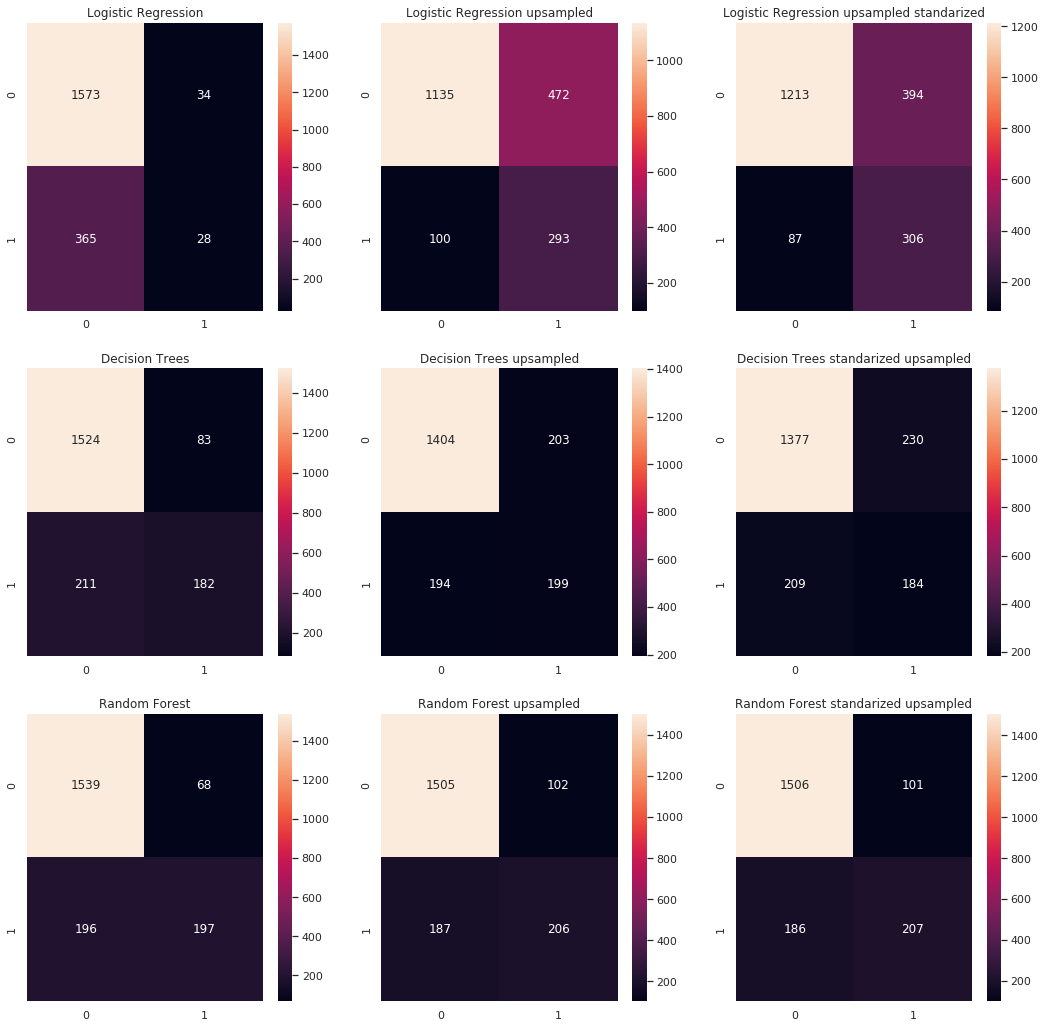

In [184]:
multiplot = plt.figure(figsize = (18,18))

m_1 = multiplot.add_subplot(3,3,1)
m_1.set_title("Logistic Regression")
sns.heatmap(cm_logistic_regression, annot = True, fmt = 'd')

m_2 = multiplot.add_subplot(3,3,2)
m_2.set_title("Logistic Regression upsampled")
sns.heatmap(cm_logistic_regression_up, annot = True, fmt = 'd')

m_3 = multiplot.add_subplot(3,3,3)
m_3.set_title("Logistic Regression upsampled standarized")
sns.heatmap(cm_logistic_regression_std_up, annot = True, fmt = 'd')

m_4 = multiplot.add_subplot(3,3,4)
m_4.set_title("Decision Trees")
sns.heatmap(cm_decision_tree, annot = True, fmt = 'd')

m_5 = multiplot.add_subplot(3,3,5)
m_5.set_title("Decision Trees upsampled")
sns.heatmap(cm_decision_tree_up, annot = True, fmt = 'd')

m_6 = multiplot.add_subplot(3,3,6)
m_6.set_title("Decision Trees standarized upsampled")
sns.heatmap(cm_decision_tree_std_up, annot = True, fmt = 'd')

m_7 = multiplot.add_subplot(3,3,7)
m_7.set_title("Random Forest")
sns.heatmap(cm_random_tree, annot = True, fmt = 'd')

m_8 = multiplot.add_subplot(3,3,8)
m_8.set_title("Random Forest upsampled")
sns.heatmap(cm_random_tree_up, annot = True, fmt = 'd')

m_9 = multiplot.add_subplot(3,3,9)
m_9.set_title("Random Forest standarized upsampled")
sns.heatmap(cm_random_tree_std_up, annot = True, fmt = 'd')

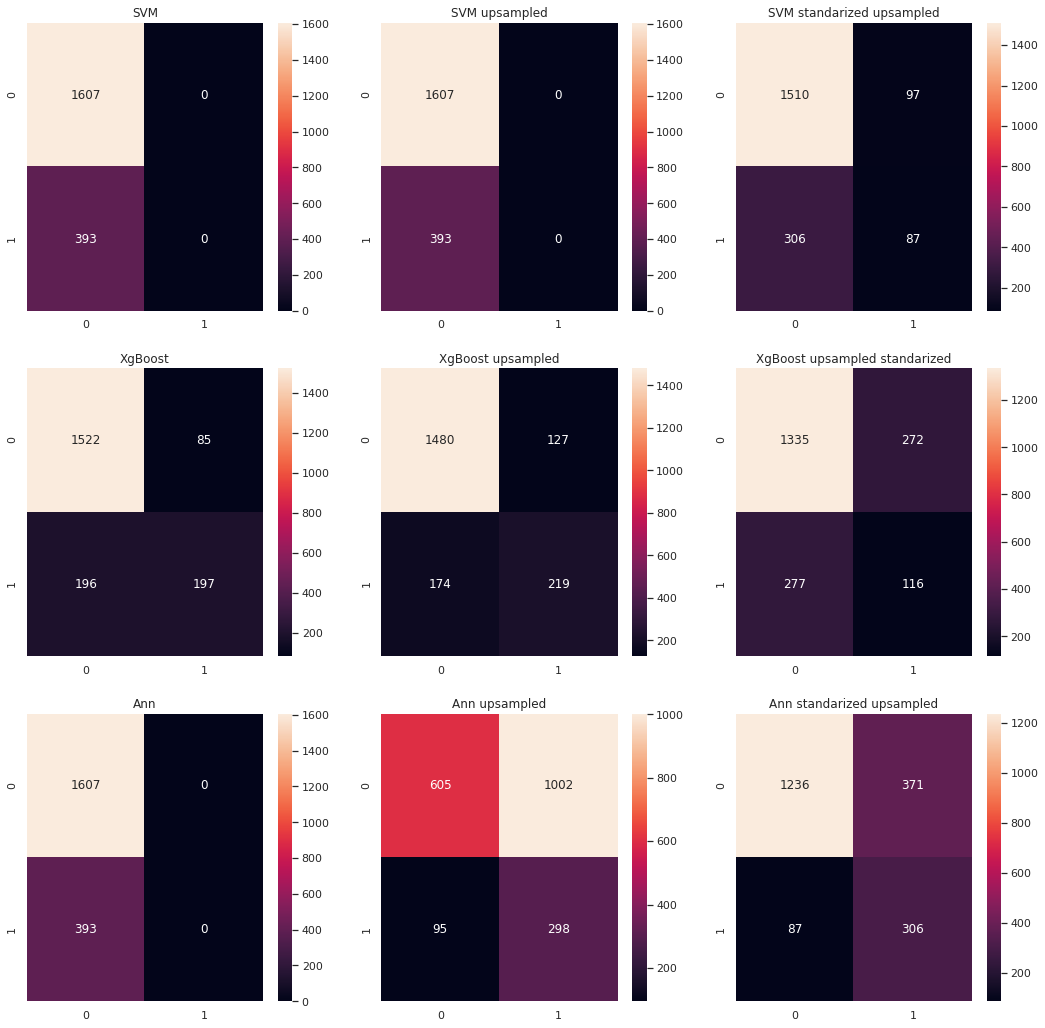

In [185]:
multiplot = plt.figure(figsize = (18,18))

m_10 = multiplot.add_subplot(3,3,1)
m_10.set_title("SVM")
sns.heatmap(cm_svm, annot = True, fmt = 'd')

m_11 = multiplot.add_subplot(3,3,2)
m_11.set_title("SVM upsampled")
sns.heatmap(cm_svm_up, annot = True, fmt = 'd')

m_12 = multiplot.add_subplot(3,3,3)
m_12.set_title("SVM standarized upsampled")
sns.heatmap(cm_svm_std_up, annot = True, fmt = 'd')

m_13 = multiplot.add_subplot(3,3,4)
m_13.set_title("XgBoost")
sns.heatmap(cm_xg_boost, annot = True, fmt = 'd')

m_14 = multiplot.add_subplot(3,3,5)
m_14.set_title("XgBoost upsampled")
sns.heatmap(cm_xg_boost_up, annot = True, fmt = 'd')

m_15 = multiplot.add_subplot(3,3,6)
m_15.set_title("XgBoost upsampled standarized")
sns.heatmap(cm_xg_boost_std_up, annot = True, fmt = 'd')

m_16 = multiplot.add_subplot(3,3,7)
m_16.set_title("Ann")
sns.heatmap(cm_ann, annot = True, fmt = 'd')

m_17 = multiplot.add_subplot(3,3,8)
m_17.set_title("Ann upsampled")
sns.heatmap(cm_ann_up, annot = True, fmt = 'd')

m_18 = multiplot.add_subplot(3,3,9)
m_18.set_title("Ann standarized upsampled")
sns.heatmap(cm_ann_std_up, annot = True, fmt = 'd')


#### Conclusions

In [186]:
model_comparison

,Model,Precision,Recall,F1-score,Accuracy
0,logistic regression,0.631637,0.525045,0.505262,0.8005
1,logistic regression upsampled,0.651017,0.725916,0.652389,0.7140
2,logistic regression standarized upsampled,0.685110,0.766724,0.697232,0.7595
3,decision tree,0.782589,0.705728,0.732610,0.8530
4,decision tree upsampled,0.686812,0.690019,0.688380,0.8015
5,decision tree standarized upsampled,0.656333,0.662535,0.659261,0.7805
6,random forest,0.815214,0.729479,0.759895,0.8680
7,random forest upsampled,0.779156,0.730350,0.750065,0.8555
8,random forest standarized upsampled,0.781074,0.731934,0.751794,0.8565
9,svm,0.401750,0.500000,0.445523,0.8035


After tunning the ANN the resulting parameters are:
Best parameters after tuning are: {'batch_size': 9, 'epochs': 100, 'optimizer': 'adam'}

For an accuracy of : 0.796

Since our ANN reaches same accuracy we decided not to re-train the ANN with those parameters.



As conclusions, we can state that te best performing algorithm according to accuracy is random forest on its base form, followed by the same model but upsampled and XgBoost, also as base model.
This 3 models present the best accuracy and predict the target variable without focusing on the people who stayed in the bank.

In [187]:
model_comparison.sort_values(by='Accuracy', ascending=False, na_position='first')

,Model,Precision,Recall,F1-score,Accuracy
6,random forest,0.815214,0.729479,0.759895,0.8680
12,XgBoost,0.792248,0.724189,0.749596,0.8595
8,random forest standarized upsampled,0.781074,0.731934,0.751794,0.8565
7,random forest upsampled,0.779156,0.730350,0.750065,0.8555
3,decision tree,0.782589,0.705728,0.732610,0.8530
13,XgBoost upsampled,0.763874,0.739111,0.750195,0.8495
19,Weighted Average standarized upsampled,0.758927,0.691505,0.715245,0.8425
9,svm,0.401750,0.500000,0.445523,0.8035
15,Ann,0.401750,0.500000,0.445523,0.8035
10,svm upsampled,0.401750,0.500000,0.445523,0.8035


Regarding the ensemble methods, AdaBoost was tremendously outperformed by XgBoost. To follow a ensemble comparation of the models:

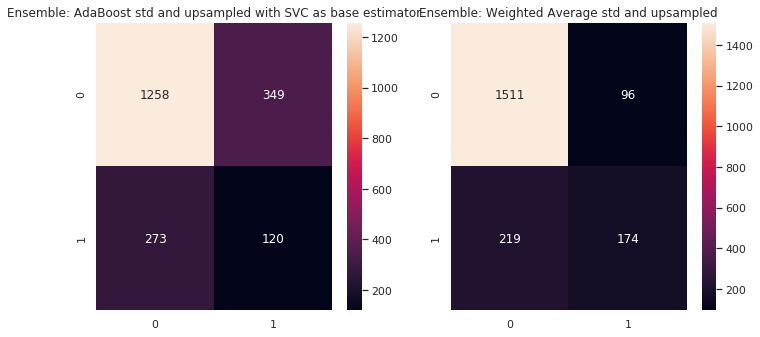

In [188]:
multiplot = plt.figure(figsize = (18,18))

e_1 = multiplot.add_subplot(3,3,1)
e_1.set_title("Ensemble: AdaBoost std and upsampled with SVC as base estimator")
sns.heatmap(cm_ada_boost, annot = True, fmt = 'd')

e_2 = multiplot.add_subplot(3,3,2)
e_2.set_title("Ensemble: Weighted Average std and upsampled")
sns.heatmap(cm_weighted_average, annot = True, fmt = 'd')

#### Model comparisons according to accuracy

In [189]:
accuracy_models=[accuracy_logistic_regression, accuracy_logistic_regression_up, accuracy_logistic_regression_std_up, 
                 accuracy_decision_tree, accuracy_decision_tree, accuracy_decision_tree_up, accuracy_decision_tree_std_up,
                accuracy_random_tree, accuracy_random_tree_up, accuracy_random_tree_std_up, accuracy_svm, accuracy_svm_up,
                accuracy_svm_up, accuracy_svm_std_up, accuracy_xg_boost, accuracy_xg_boost_up, accuracy_xg_boost_std_up,
                accuracy_ann, accuracy_ann_up, accuracy_ann_std_up, accuracy_ada_boost, accuracy_weighted_average]
labels=['accuracy_logistic_regression', 'accuracy_logistic_regression_up', 'accuracy_logistic_regression_std_up', 
                 'accuracy_decision_tree', 'accuracy_decision_tree', 'accuracy_decision_tree_up', 'accuracy_decision_tree_std_up',
                'accuracy_random_tree', 'accuracy_random_tree_up', 'accuracy_random_tree_std_up', 'accuracy_svm, accuracy_svm_up',
                'accuracy_svm_up', 'accuracy_svm_std_up', 'accuracy_xg_boost', 'accuracy_xg_boost_up', 'accuracy_xg_boost_std_up',
                'accuracy_ann', 'accuracy_ann_up', 'accuracy_ann_std_up', 'accuracy_ada_boost', 'accuracy_weighted_average']
y_pos = np.arange(len(accuracy_models))

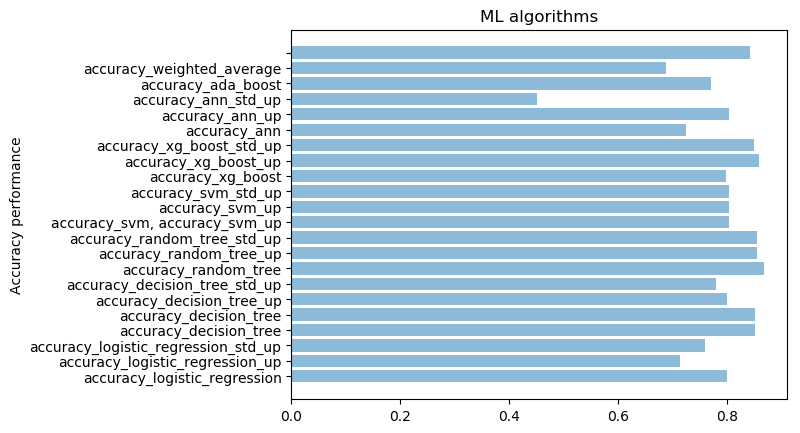

In [190]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.barh(y_pos, accuracy_models, align='center', alpha=0.5)
plt.yticks(y_pos, labels)
plt.ylabel('Accuracy performance')
plt.title('ML algorithms')
plt.show()

It is also worth mentioning that, results followed the theory behind them as the algorithms which performed high accuracy  without the standarization are the decision rule based algorithms, namely the decision trees and their ensemble versions.